In [157]:
#!pip install sweetviz

In [158]:
#pip install pyspark

In [159]:
#pip install pywaffle


In [160]:
#pip install folium pandas

In [161]:
#!pip install sweetviz --user


In [162]:
#import sys
#!{sys.executable} -m pip install sweetviz

In [163]:
#import sys
#!{sys.executable} -m pip install mplsoccer

In [164]:
#!pip install mplsoccer


In [165]:
#pip install dash dash-bootstrap-components plotly

In [166]:
#!pip install mplsoccer


In [167]:
#!pip install --upgrade pandas numpy


In [168]:
#!pip install highlight-text


In [169]:
# !pip uninstall -y pandas numpy
# !pip install pandas numpy


In [170]:
#pip install numpy==1.23.5 pandas

In [171]:
#!pip install pyspark


In [172]:
#!pip install --upgrade jinja2

In [173]:
#pip install --upgrade Flask

In [174]:
import sys
import numpy
import pandas
import os

In [175]:
import dash
from dash import dcc, html
import plotly.express as px

In [176]:
import jinja2
import flask

print("Jinja2 Version:", jinja2.__version__)
print("Flask Version:", flask.__version__)


Jinja2 Version: 3.1.6
Flask Version: 3.1.0


/var/folders/n5/l10z0lr57hdfl08j5wcd1gcc0000gn/T/ipykernel_74418/3000826852.py:5: DeprecationWarning:

The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.



In [177]:
import dash
from dash import dcc, html  # Import components directly from Dash
import plotly.express as px

In [178]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, when
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [179]:
# importing librarires
# 1. For data handling and upload
import pandas as pd
import numpy as np
import sqlite3
import jinja2
# # 2. For visualization
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sweetviz as sv
import seaborn as sns
# from highlight_text import fig_text
from pywaffle import Waffle
from IPython.display import IFrame
import plotly.graph_objects as go

# # 3. For Data preprocessing
from sklearn.impute import KNNImputer

# # 4. For ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [180]:
import tensorflow as tf

In this project we will perform EDA Analysis to explore dataset's insights. Then we will find out the relationship between features and predictors to check which features are more relevant to the target variable and at the end we will build and evaluate a machine learning model for it.

NOTEBOOK OBJECTIVES

This notebook aims to:

Quick EDA by sweetviz library.

Visualization of data using various types of visualization (Pie charts, Bar charts, Waffle chart, Butterfly chart, 
Scatter chart).

Tuning and building of various ML models to predict level of heart disease for patients.

Choosing the best algorithm.

Combing testing data, actual _label and predicted_label in a DataFrame.

META DATA OF DATASET

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.. This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG) features, and more.

id : Unique id for each patient.

age : The age of the patient in years.

origin : Place of study.

sex : Gender of the patient (0: female, 1: male).

cp : Type of chest pain (Typical angina, atypical angina, non-anginal, asymptomatic).

trestbps : Resting blood pressure (in mm Hg on admission to the hospital).

fbs : Fasting blood sugar (True : > 120 mg/dl, False : < 120 mg/dl).

chol : Serum cholesterol in mg/dl.

thalach : Maximum heart rate achieved.

exang : Exercise induced angina.

oldpeak : ST depression induced by exercise relative to rest.
ca : Number of Major Vessels (0 ,1, 2, 3, 4).

num : [(0 mean No heart disease), (1 mean mild heart disease), (2 mean moderate heart disease),(3 mean severe heart disease), (4 mean critical heart disease)].

In [181]:
df = pd.read_csv("heart_disease_uci.csv")


In [182]:
# Connect to SQLite (Creates a new database if not existing)
conn = sqlite3.connect("heart_disease.db")

# Store the dataframe into an SQLite table
df.to_sql("heart_disease", conn, if_exists="replace", index=False)
# Display the first 5 rows
print(df_sql)

    avg_age    avg_chol
0  53.51087  199.130337


In [183]:
# Run the SQL query
query = "SELECT age, chol FROM heart_disease WHERE age > 50;"
df_sql_age = pd.read_sql(query, conn)
print(df_sql_age.head())



   age   chol
0   63  233.0
1   67  286.0
2   67  229.0
3   56  236.0
4   62  268.0


In [184]:
query = "SELECT AVG(age) AS avg_age, AVG(chol) AS avg_chol FROM heart_disease;"
df_sql = pd.read_sql(query, conn)
print(df_sql)


    avg_age    avg_chol
0  53.51087  199.130337


In [185]:
query = "SELECT COUNT(*) FROM heart_disease;"
df_sql = pd.read_sql(query, conn)
print(df_sql)

   COUNT(*)
0       920


In [186]:
# Commit and close connection
conn.commit()

1. Reading in Dataset

In [187]:
# importing and reading dataset
pd.set_option('display.max_columns', None)
heart = pd.read_csv('heart_disease_uci.csv')
heart=heart.rename(columns={'num':'target', 'dataset':'origin','fbs':'fast_blood_sugar','cp':'chest_pain_type'})
heart.head(5)

,id,age,sex,origin,chest_pain_type,trestbps,chol,fast_blood_sugar,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


2| EDA by Sweezy

Comment: This is Quick EDA by sweetviz, we can see summary statistics of each columns as well as missing values. .we can also check the data distribution in each column and its skewness. we will aslo check column one by one and will explore their relationship with one another later on

                                             |      | [  0%]   00:00 -> (? left)


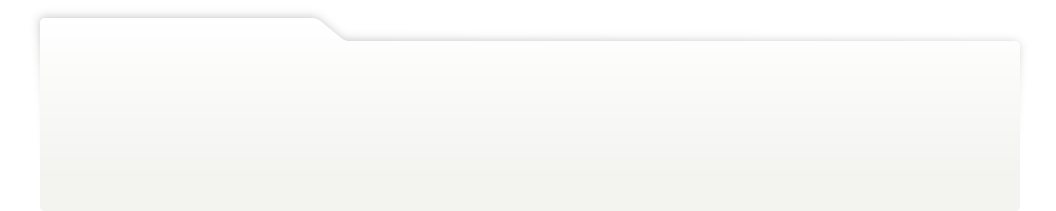
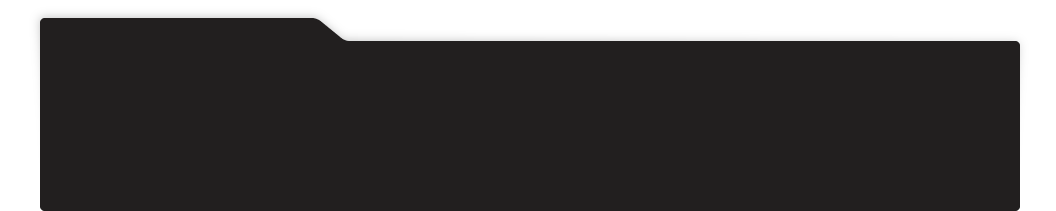
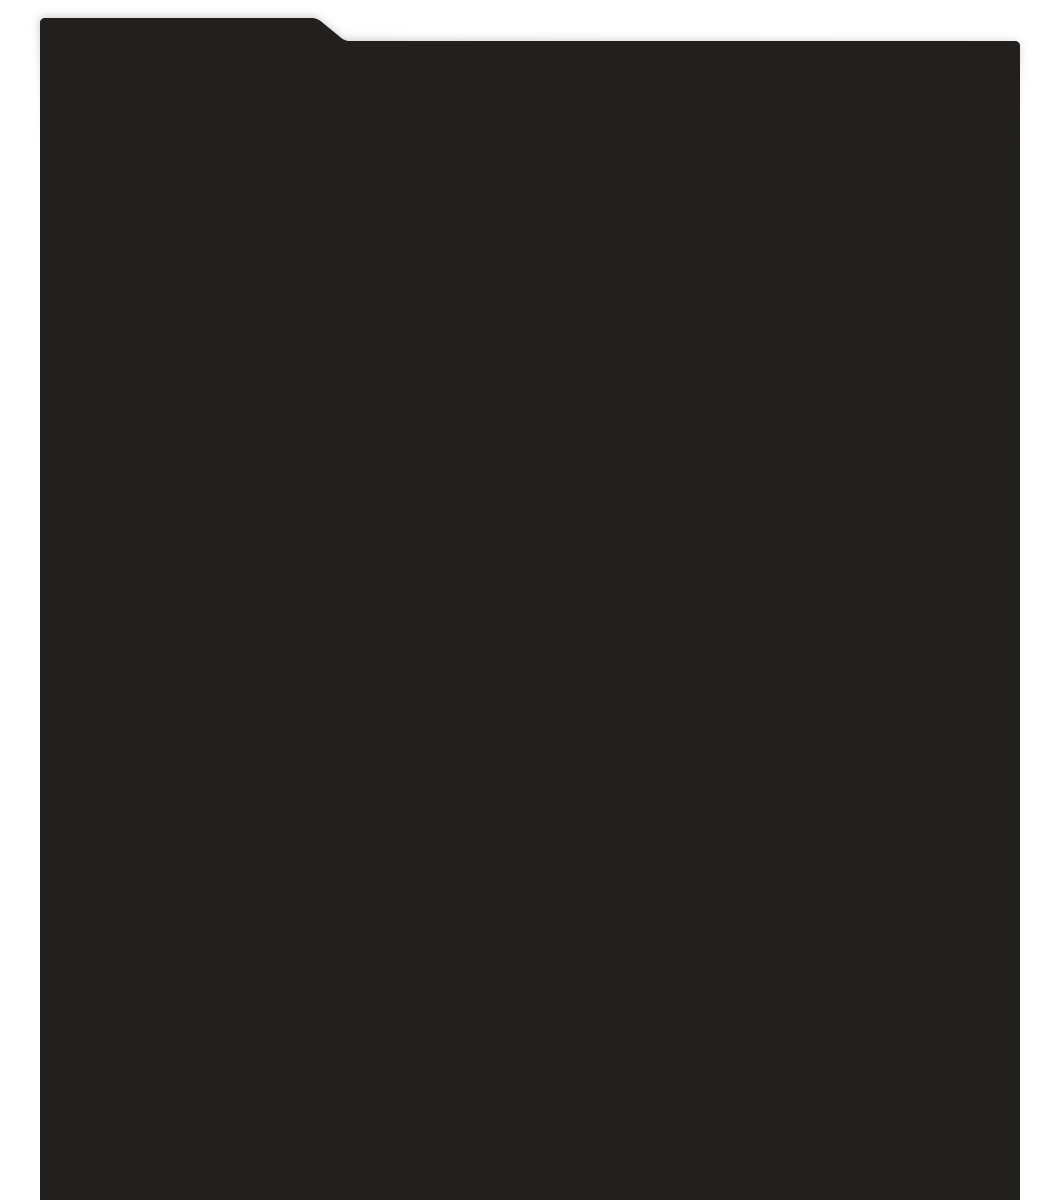
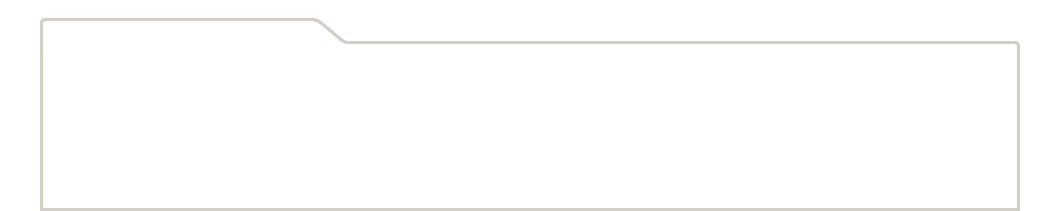
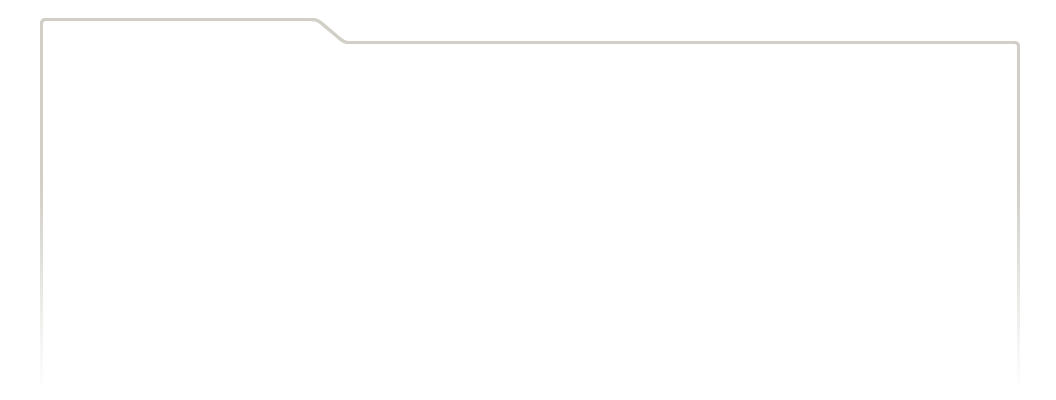
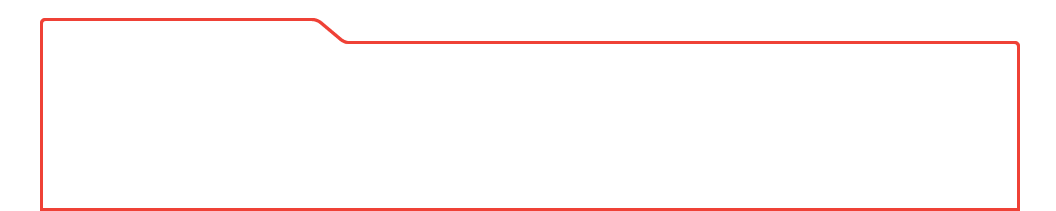
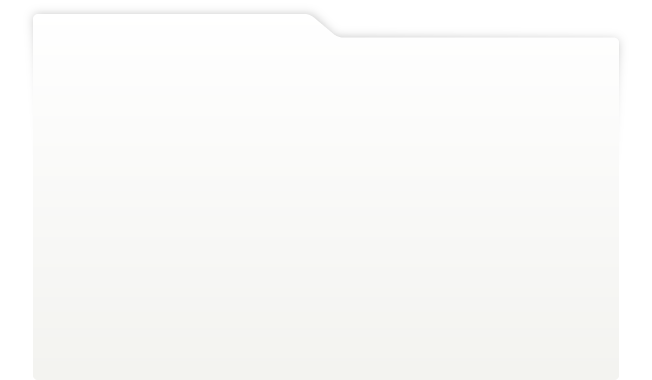
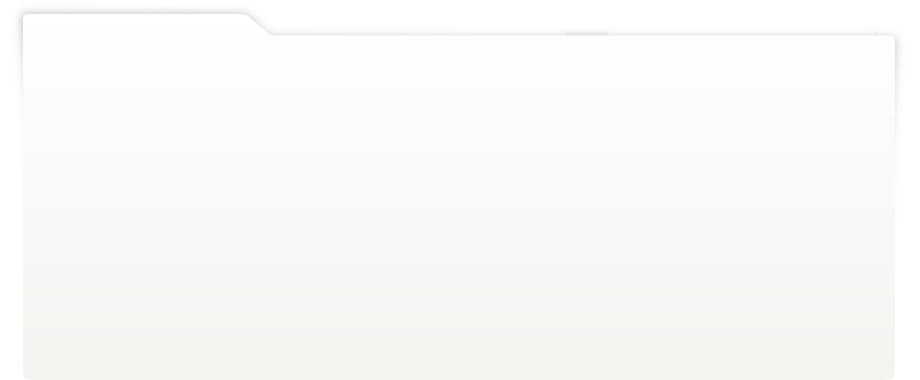
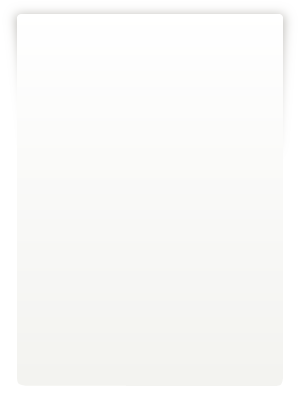
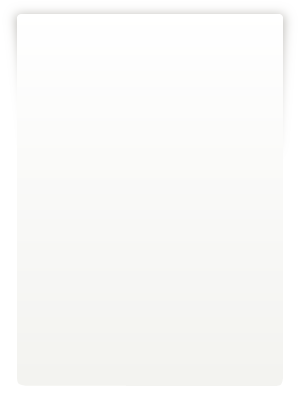
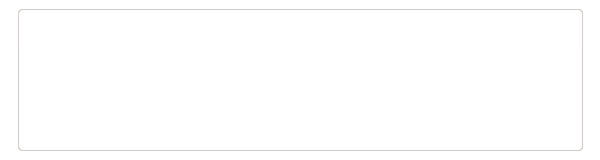
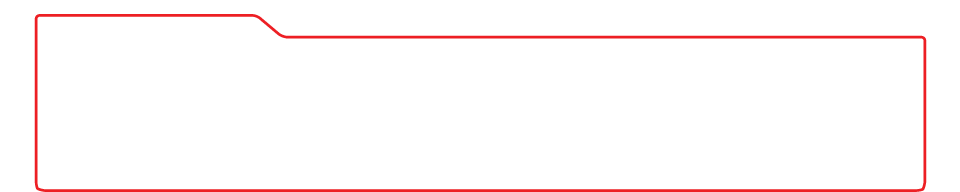
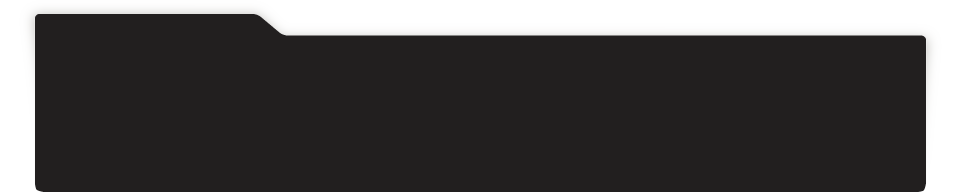
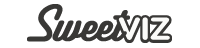
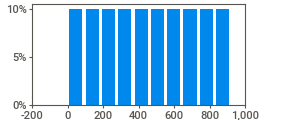
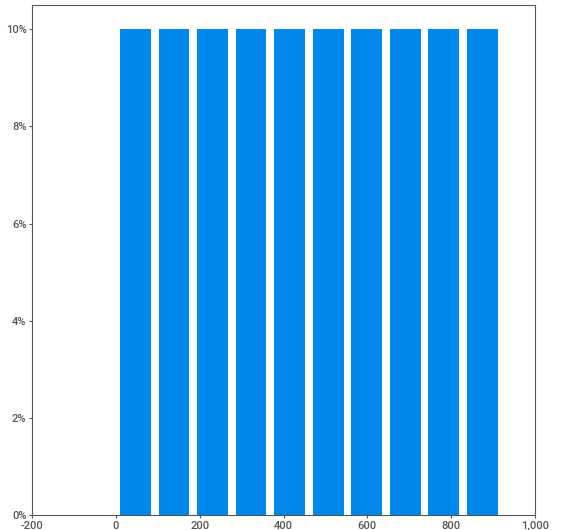
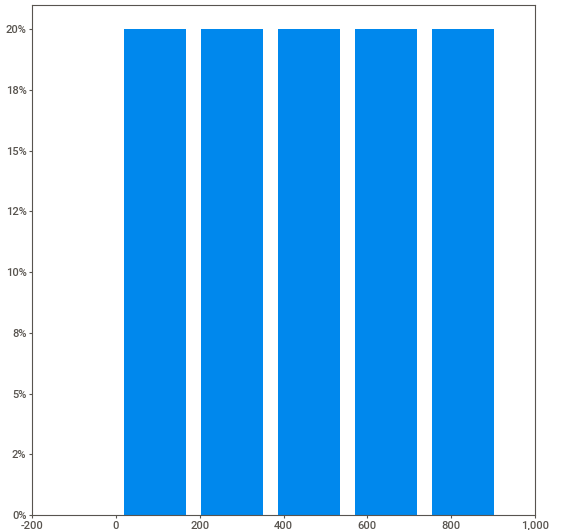
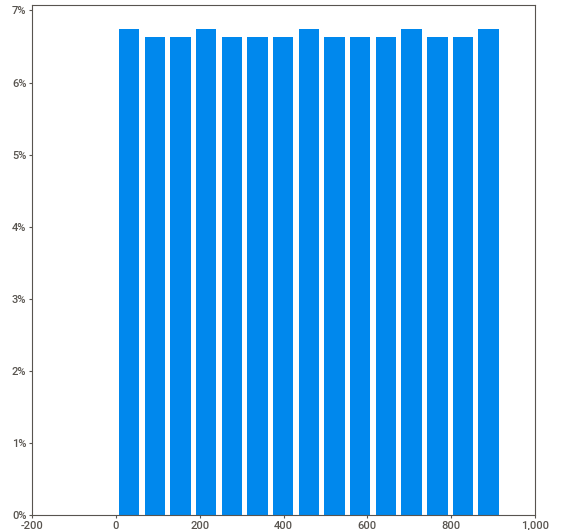
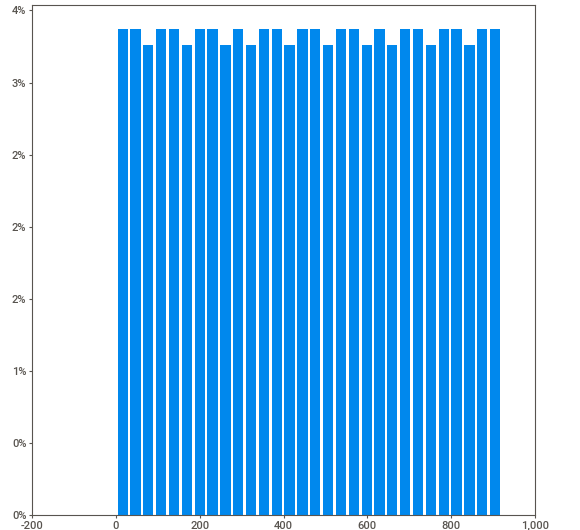
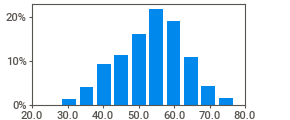
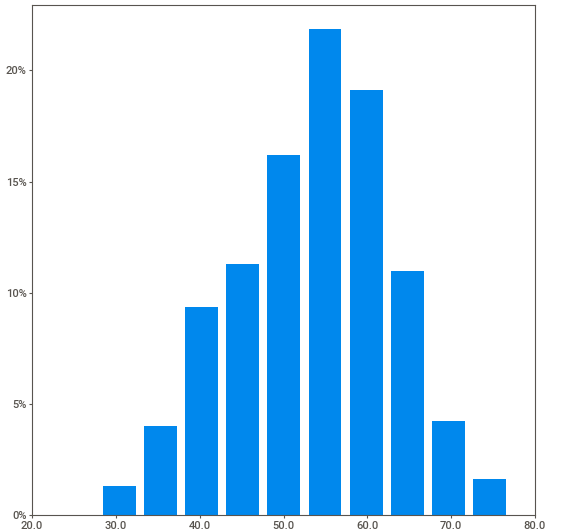
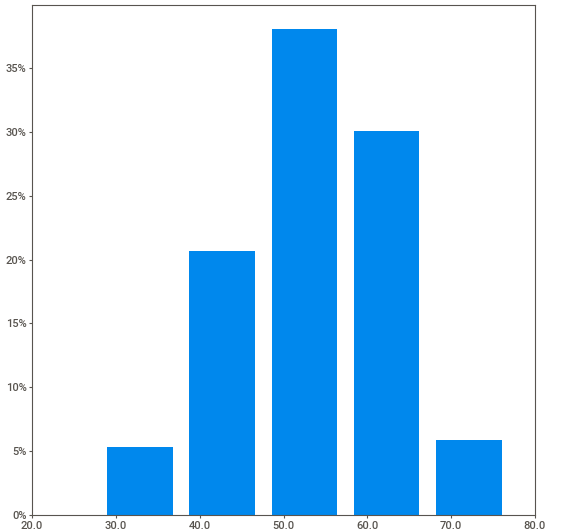
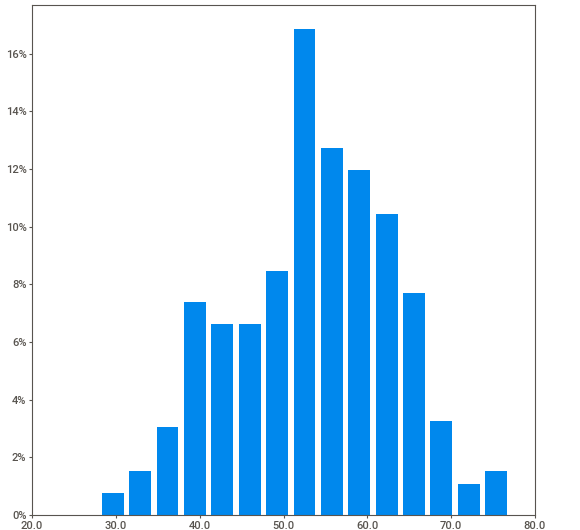
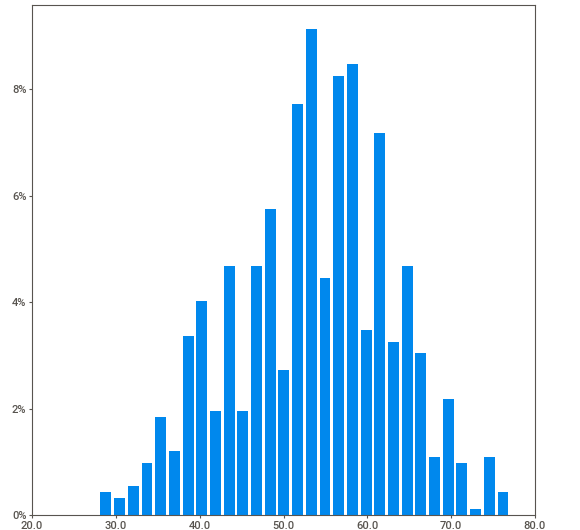
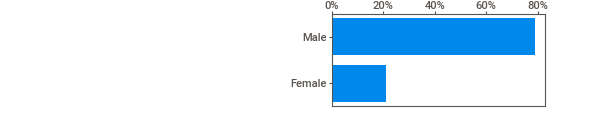
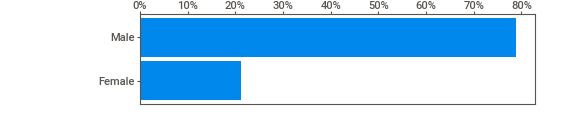
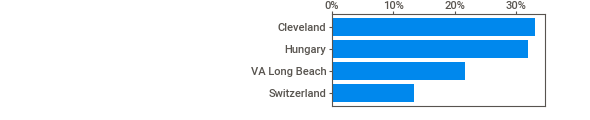
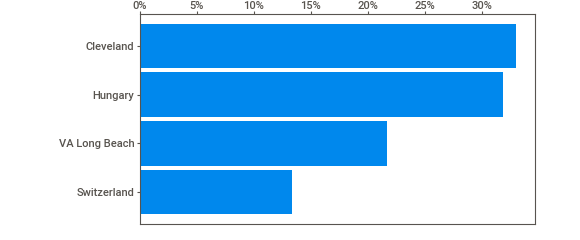
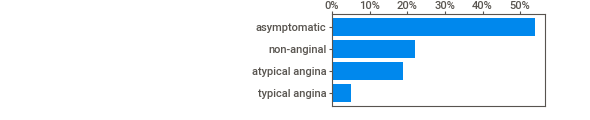
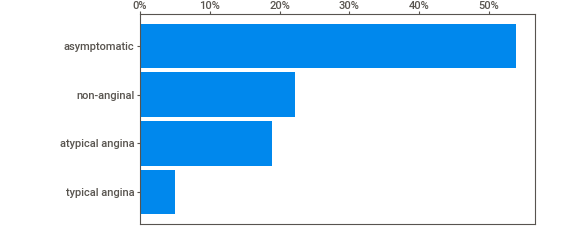
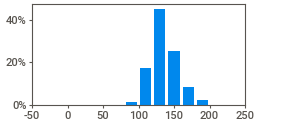
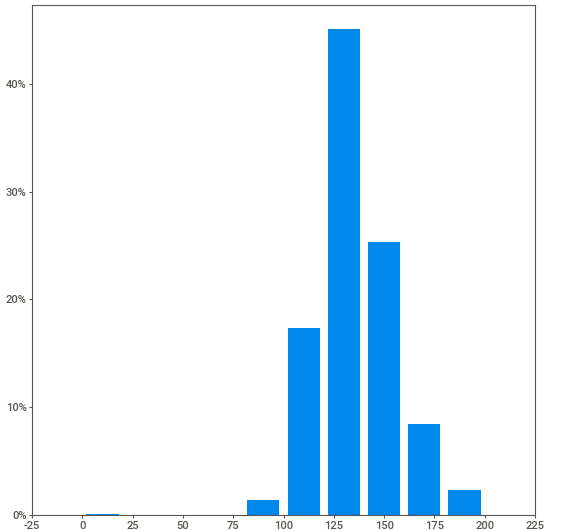
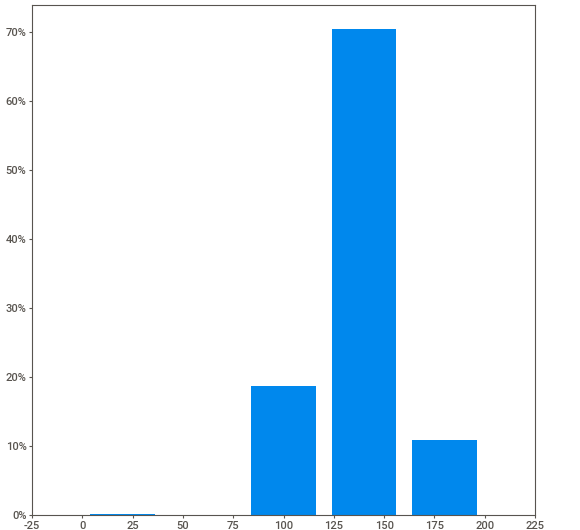
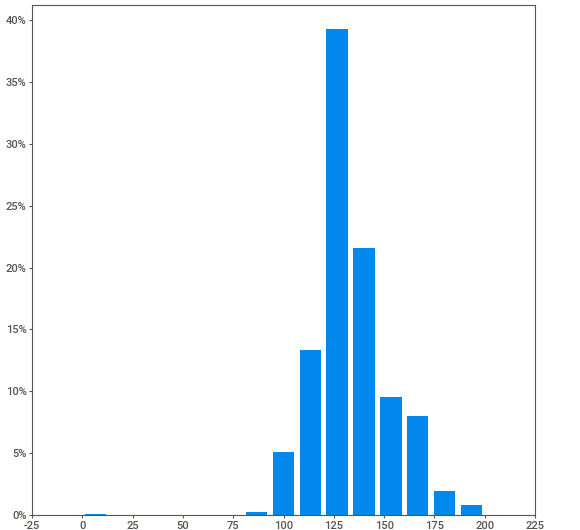
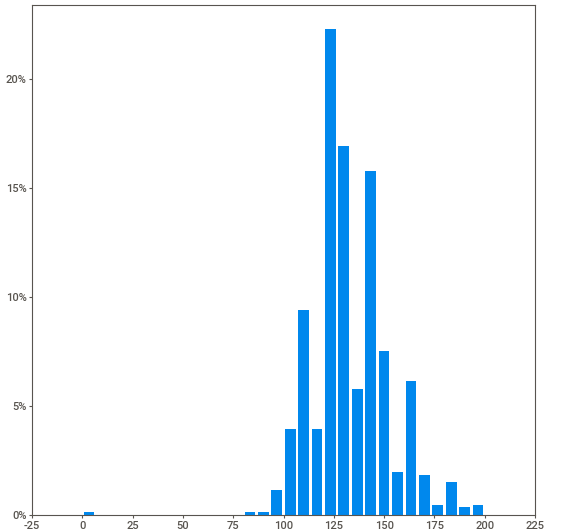
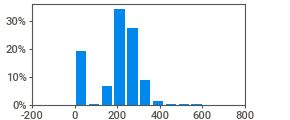
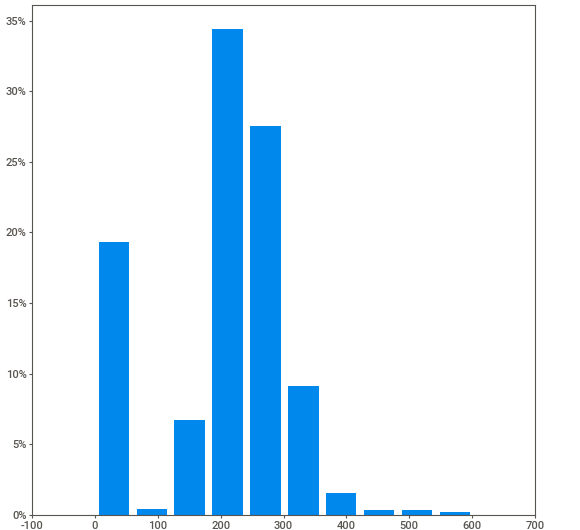
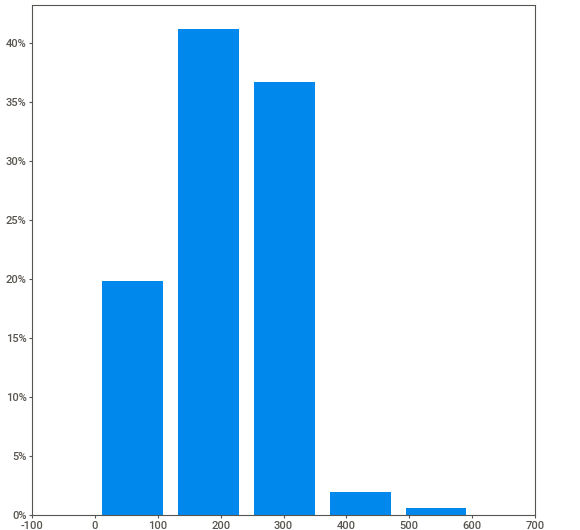
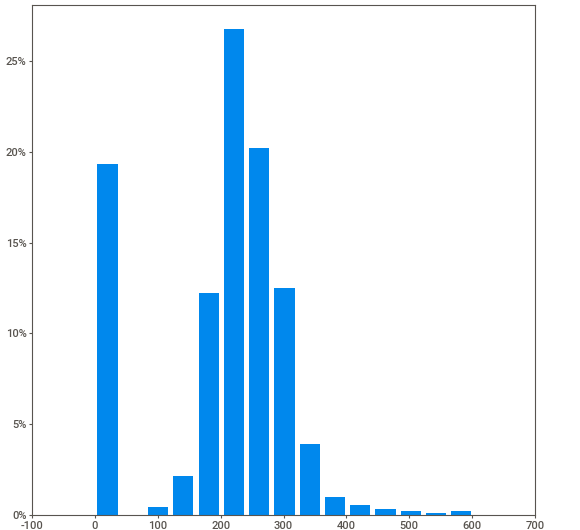
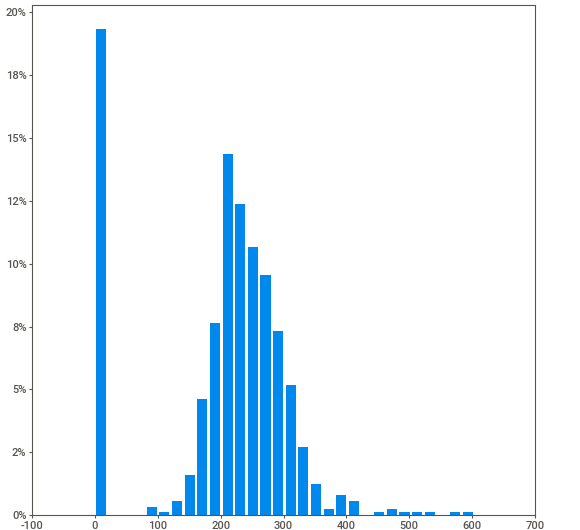
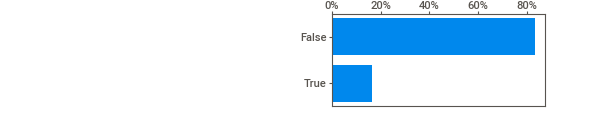
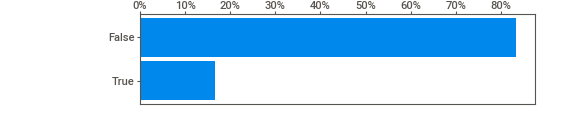
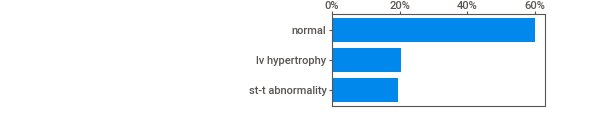
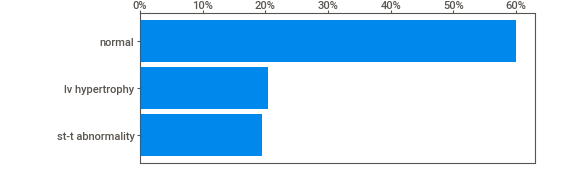
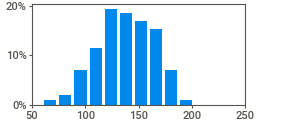
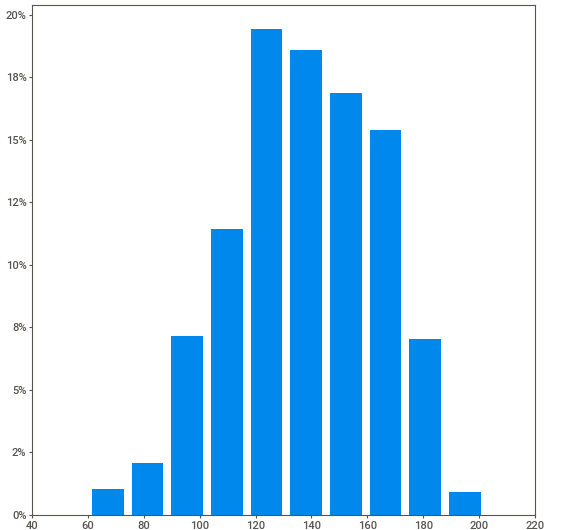
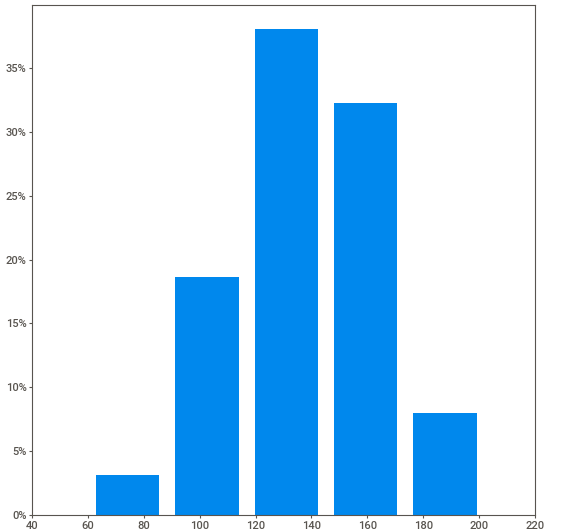
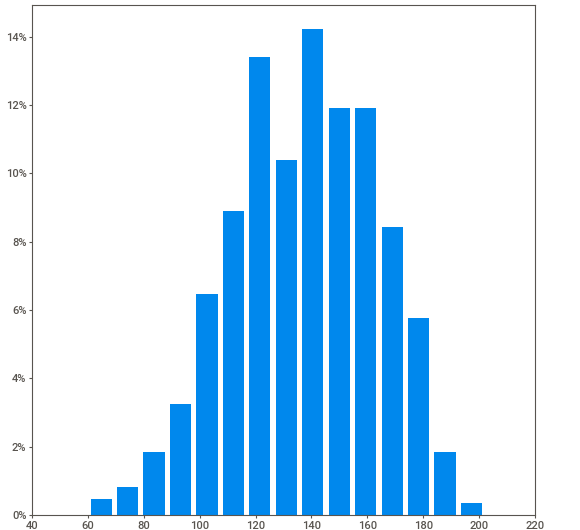
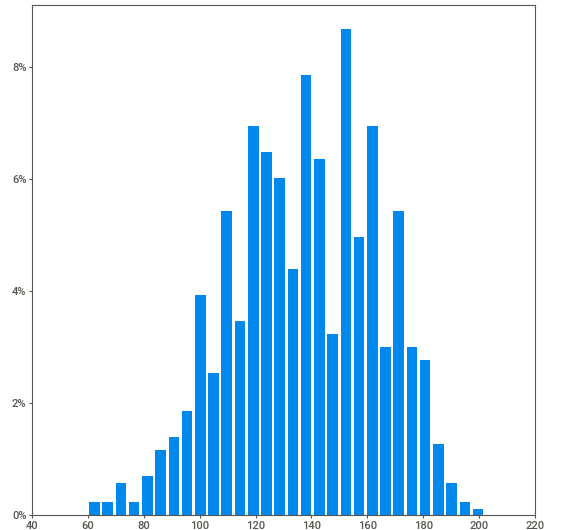
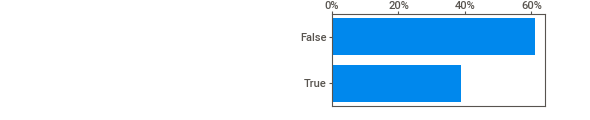
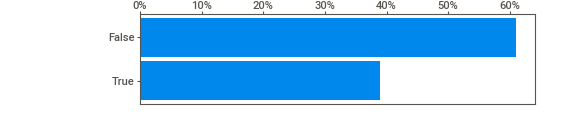
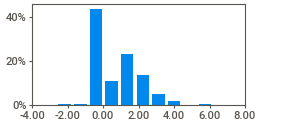
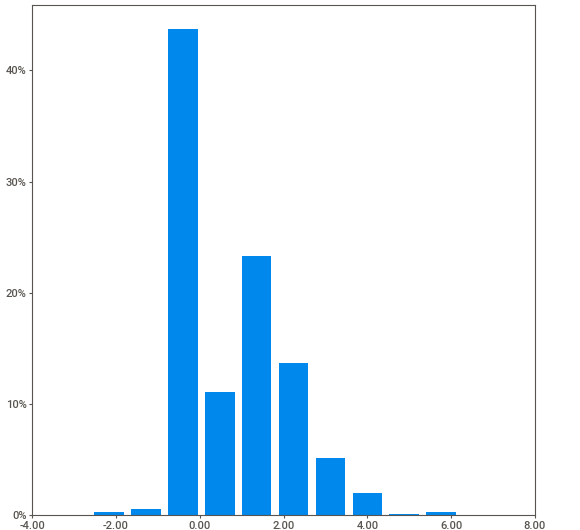
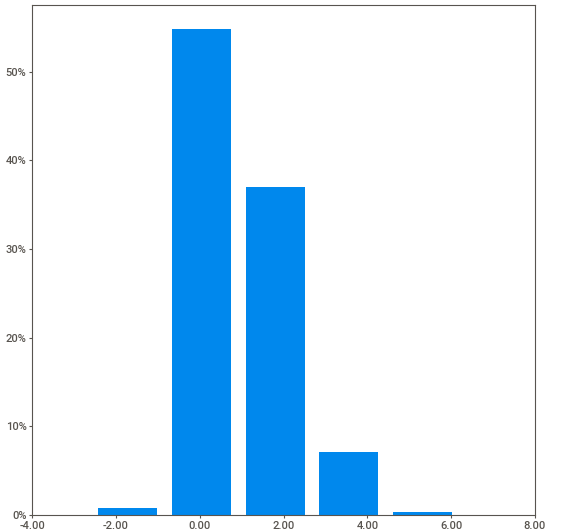
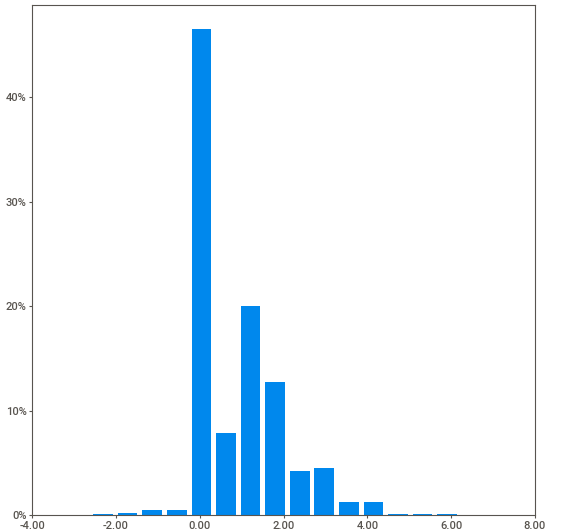
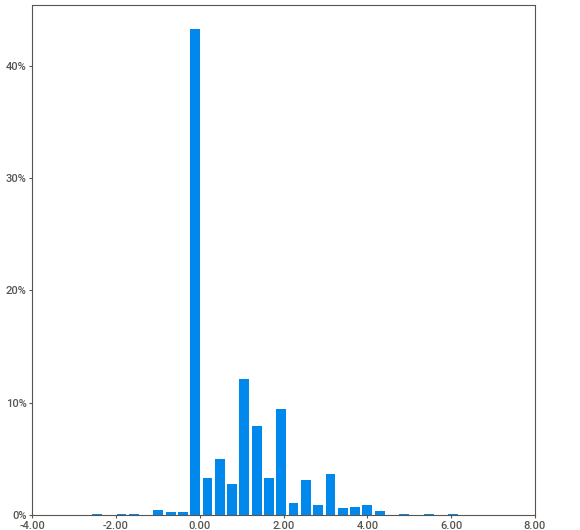
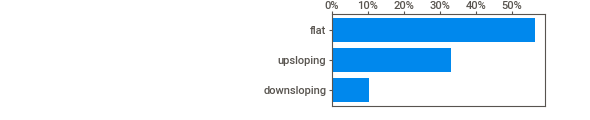
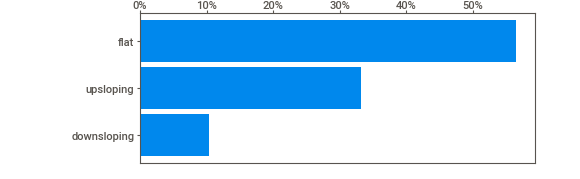
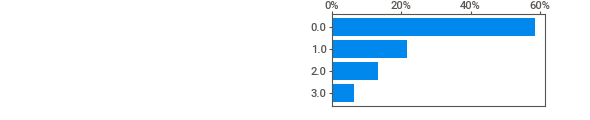
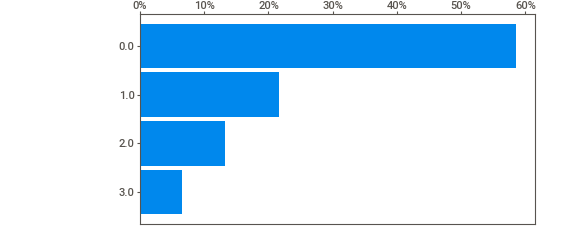
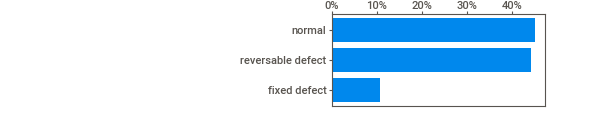
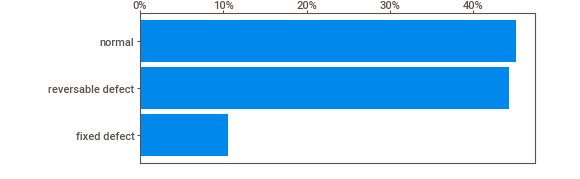
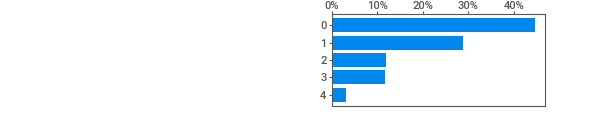
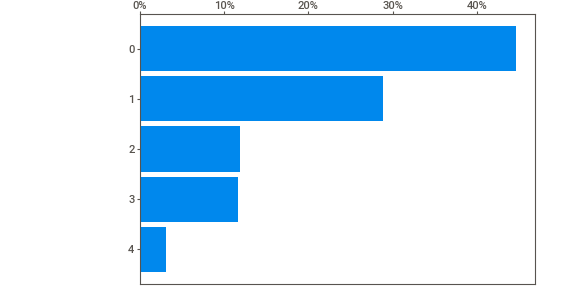
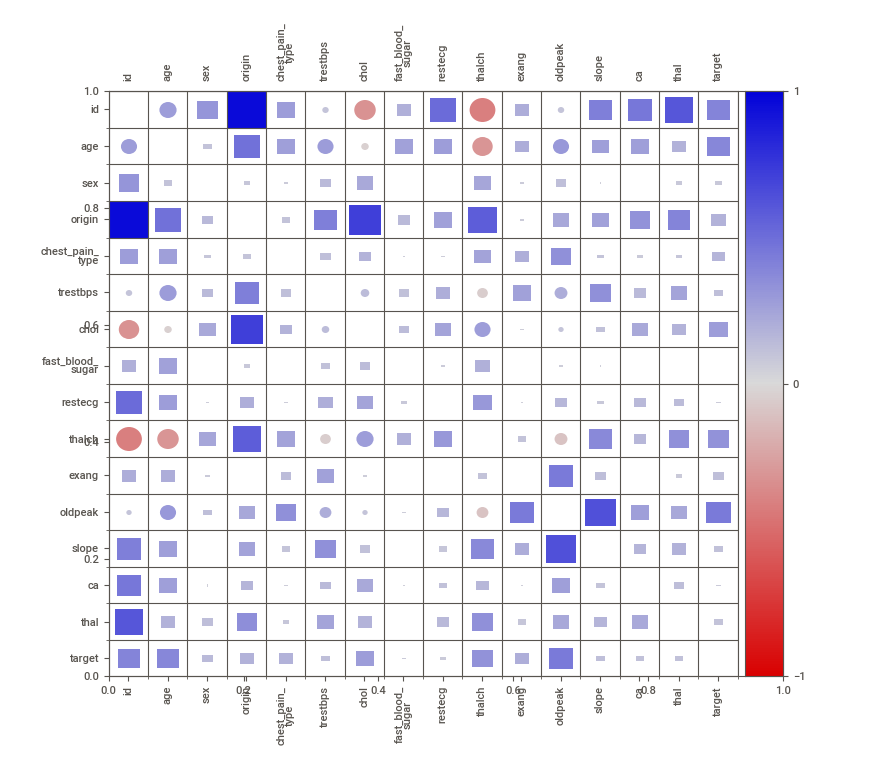
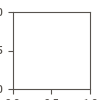

In [188]:
df_eda = sv.analyze(heart)
df_eda.show_notebook()

3. Summary Statistics

In [189]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                920 non-null    int64  
 1   age               920 non-null    int64  
 2   sex               920 non-null    object 
 3   origin            920 non-null    object 
 4   chest_pain_type   920 non-null    object 
 5   trestbps          861 non-null    float64
 6   chol              890 non-null    float64
 7   fast_blood_sugar  830 non-null    object 
 8   restecg           918 non-null    object 
 9   thalch            865 non-null    float64
 10  exang             865 non-null    object 
 11  oldpeak           858 non-null    float64
 12  slope             611 non-null    object 
 13  ca                309 non-null    float64
 14  thal              434 non-null    object 
 15  target            920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory us

In [190]:
heart.describe(include=['number'])

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Summary Results: Total number of patients are 920. 

Min age for having heart disease is 28 years and Max is 77 years.

Cholestrol level ranges from 0 to 603 mg/dl.

oldpeak : ST depression found on ECG ranges from -2.6 to 6.2 it indicates an abnormality in heart's electrical 

activity and it characterized by a downward deflection of ST segment.

Resting BP (trestbps) ranges from 0 to 200 mm hg.

No of major vessels colored by flouroscopy ranges from 0 to 3.

In [191]:
# Check missing values
round(heart.isnull().sum()*100/len(heart), 2)

id                   0.00
age                  0.00
sex                  0.00
origin               0.00
chest_pain_type      0.00
trestbps             6.41
chol                 3.26
fast_blood_sugar     9.78
restecg              0.22
thalch               5.98
exang                5.98
oldpeak              6.74
slope               33.59
ca                  66.41
thal                52.83
target               0.00
dtype: float64

4. Separating Features and Data Types

In [192]:
# counting categorical and numerical columns
cat_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'chest_pain_type', 'sex', 'target', 'origin']
bool_cols = ['fast_blood_sugar', 'exang']
num_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

print(f'Categorical_Columns : {cat_cols}')
print(f'Numeric_Columns     : {num_cols}')
print(f'Boolean_Columns     : {bool_cols}')

Categorical_Columns : ['thal', 'ca', 'slope', 'exang', 'restecg', 'chest_pain_type', 'sex', 'target', 'origin']
Numeric_Columns     : ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
Boolean_Columns     : ['fast_blood_sugar', 'exang']


From this above, we can check that several columns have missing values in it, some are categorical dtype and some are numerical.

As we can see that ca & thal are the columns which have more than 50% missing values.

we normally drop those columns who have upto 80% missing values, so here we will impute them using Iterative imputer which is more accurate than KNN Imputer.

Its better to first impute these missing values then we can perform better EDA.

We can also impute missing values in pipeline, as we have to perform EDA so its better to impute missing values before going towards the prediction mechanism.

5. Imputing Missing Values and Datasets

In [193]:
# Imputing Missing values

# Imputing missing values in categorical columns
for column in cat_cols:
    heart[column] = heart[column].fillna(heart[column].mode()[0])

# # Imputing missing values in numerical columns
for column in num_cols:
    heart[column] = heart[column].fillna(heart[column].mean())

# Imputing missing values in boolean columns   
for column in bool_cols:
    heart[column] = heart[column].fillna(heart[column].mode()[0])


In [194]:
print(heart.isnull().sum())


id                  0
age                 0
sex                 0
origin              0
chest_pain_type     0
trestbps            0
chol                0
fast_blood_sugar    0
restecg             0
thalch              0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
target              0
dtype: int64


In [195]:
# Select numerical columns
num_cols = heart.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [196]:
# Convert numerical columns to float to avoid correlation issues
heart[num_cols] = heart[num_cols].apply(pd.to_numeric, errors='coerce')
heart[num_cols].head(5)

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [197]:
# Fill NaNs with column mean before correlation calculation
heart[num_cols] = heart[num_cols].fillna(heart[num_cols].mean())
heart[num_cols].head(5)

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


6. Correlation Matrix

In [198]:
# Compute correlation matrix
corr_matrix = heart[num_cols].corr()
corr_matrix

,id,age,trestbps,chol,thalch,oldpeak,ca,target
id,1.000000,0.239301,0.049369,-0.372984,-0.436795,0.046473,-0.385881,0.273552
age,0.239301,1.000000,0.235253,-0.084499,-0.353471,0.248082,0.219413,0.339596
trestbps,0.049369,0.235253,1.000000,0.088290,-0.104616,0.160268,0.036427,0.116225
chol,-0.372984,-0.084499,0.088290,1.000000,0.226325,0.045498,0.155212,-0.228238
thalch,-0.436795,-0.353471,-0.104616,0.226325,1.000000,-0.149630,0.040328,-0.351055
oldpeak,0.046473,0.248082,0.160268,0.045498,-0.149630,1.000000,0.210538,0.421907
ca,-0.385881,0.219413,0.036427,0.155212,0.040328,0.210538,1.000000,0.261797
target,0.273552,0.339596,0.116225,-0.228238,-0.351055,0.421907,0.261797,1.000000


7. Data Visualization

7.1 | FREQUENCY DISTRIBUTION OF CATEGORICAL FEATURES

In [199]:
heart = heart.rename(columns={'num': 'target', 'dataset': 'origin', 'fbs': 'fast_blood_sugar', 'cp': 'chest_pain_type'})

In [200]:
print(heart.columns)

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [201]:
heart.rename(columns=lambda x: x.strip(), inplace=True)  # Remove unwanted spaces
print(heart.columns)  # Check column names again

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [202]:
print([col for col in heart.columns if 'pain' in col.lower()])

['chest_pain_type']


In [203]:
heart.rename(columns=lambda x: x.strip(), inplace=True)


In [204]:
df_check = pd.read_csv("heart_disease_uci.csv")
print(df_check.columns)  # Print column names as they exist in the file

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


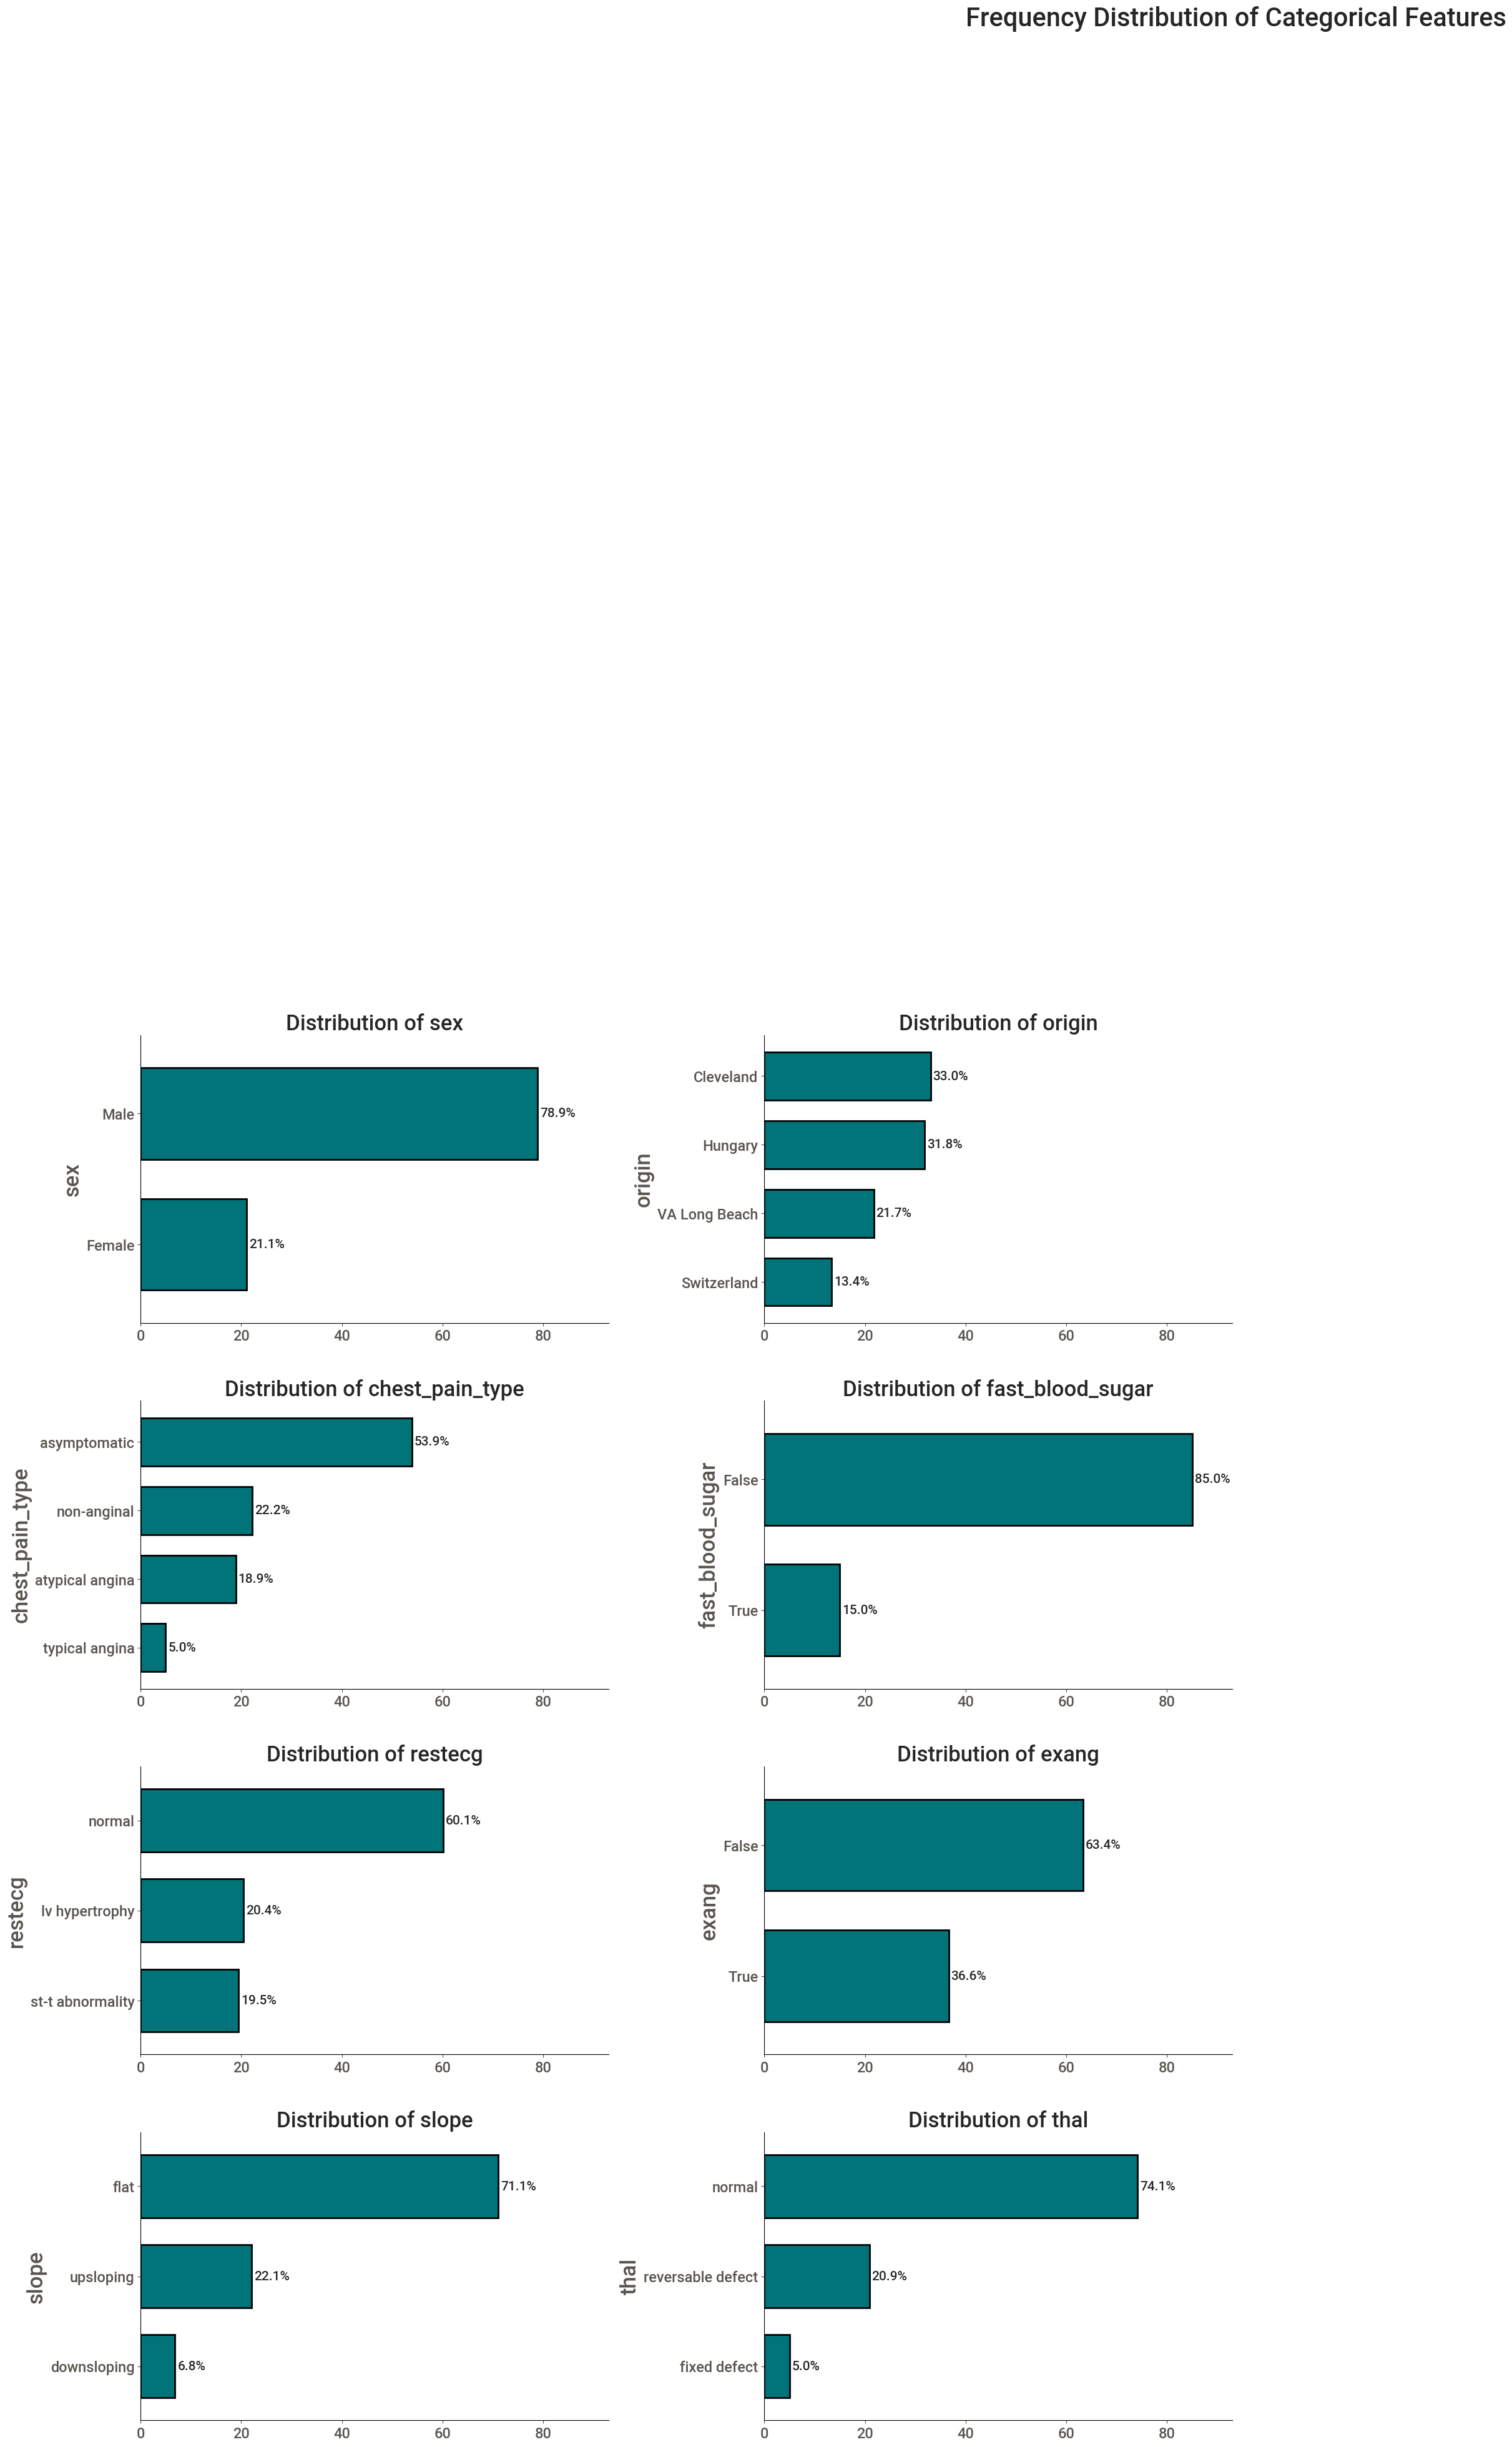

In [205]:
# Only keep categorical columns that exist in the DataFrame
categorical_columns = [col for col in categorical_columns if col in heart.columns]

plt.figure(figsize=(20, 35))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 2, i)

    value_counts = heart[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', width=0.7, color='#01747a', edgecolor='black', linewidth=2)

    ax = plt.gca()
    for index, value in enumerate(value_counts):
        plt.text(value + 0.5, index, str(round(value, 1)) + '%', fontsize=15, fontweight='bold', va='center')

    plt.title(f'\nDistribution of {col}', fontsize=25, fontweight='bold')
    plt.yticks(fontsize=17, fontweight='bold')
    plt.xticks(fontsize=17, fontweight='bold')
    plt.ylabel(col, fontsize=25, fontweight='bold')
    plt.xlim([0, 93])
    plt.grid(False)

    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.text(x=40, y=26, s='Frequency Distribution of Categorical Features', fontsize=30, fontweight='bold')
plt.show()

7.2 | PIE CHART OF GENDER DISTRIBUTION

In [261]:
# Ensure the 'sex' Column exists
print(heart.columns)  # Verify column names
print(heart['sex'].unique())  # Check unique values

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')
[1 0]


In [262]:
#Get rid of unexpected spaces
heart.rename(columns=lambda x: x.strip(), inplace=True)  # Remove unwanted spaces
heart['sex'] = heart['sex'].astype(str)  # Ensure it's a string

In [263]:
#Implement the gender pie chart

# Group by 'sex' and count occurrences
gender_count = heart['sex'].value_counts()

# Define colors
colors = ['#32a0a8', '#599173']

# Create pie chart
fig = go.Figure(data=[go.Pie(
    labels=gender_count.index, 
    values=gender_count.values,
    textinfo='label+percent',  
    marker=dict(colors=colors, line=dict(color='black', width=2))
)])

# Customize layout
fig.update_layout(
    paper_bgcolor='#dff2ef',
    plot_bgcolor='#dff2ef',
    title='Distribution of Gender Among Samples',
    width=650, height=600,
    title_x=0.5, 
    title_font_family="Times New Roman", 
    title_font_color="#191e1f", 
    title_font_size=30,
    font_family="Times New Roman",
    font_size=15
)

# Show the plot
fig.show()

7.3 | PIE CHART OF STATES DATA

In [264]:
#Verify origin of the column
print(heart.columns)  # Check column names
print(heart['origin'].unique())  # Check unique values in the column

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')
['0' '1' '2' '3']


In [265]:
#Clean the column and remove any formatting issues
heart.rename(columns=lambda x: x.strip(), inplace=True)  # Remove unwanted spaces
heart['origin'] = heart['origin'].astype(str)  # Ensure the column is a string type

In [266]:
# Group by 'origin' and count occurrences
origin_count = heart['origin'].value_counts()

# Define colors
colors = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']

# Create pie chart
fig = go.Figure(data=[go.Pie(
    labels=origin_count.index, 
    values=origin_count.values,
    pull=[0.1, 0, 0, 0],  # Slightly "explode" first slice
    textinfo='label+percent',
    marker=dict(colors=colors, line=dict(color='black', width=2))
)])

# Customize layout
fig.update_layout(
    paper_bgcolor='#dff2ef',
    plot_bgcolor='#dff2ef',
    title='Data Collection States',
    width=650, height=600,
    title_x=0.5, 
    title_font_family="Times New Roman", 
    title_font_color="#191e1f", 
    title_font_size=30,
    font_family="Times New Roman",
    font_size=15
)

# Show the plot
fig.show()

In [267]:
# Ensure correct column names
origin_count = heart['origin'].value_counts().reset_index()
origin_count.columns = ['State', 'Count']  # Rename to match 'State' and 'Count'

# Define colors
colors = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']

# Create Pie Chart (Dash version)
fig = px.pie(
    origin_count, values='Count', names='State', color_discrete_sequence=colors,
    title="Data Collection States"
)


In [268]:
# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Data Collection States", style={'textAlign': 'center', 'color': '#191e1f'}),
    dcc.Graph(figure=fig)  # Embeds the Plotly Pie Chart
])

# Updated Run Command
if __name__ == '__main__':
    app.run(debug=True)  # Use app.run() instead of app.run_server()

Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/werkzeug/serving.py", line 759, in __init__
    self.server_bind()
  File "/opt/anaconda3/lib/python3.9/http/server.py", line 136, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/opt/anaconda3/lib/python3.9/socketserver.py", line 466, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 48] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/n5/l10z0lr57hdfl08j5wcd1gcc0000gn/T/ipykernel_74418/1568323424.py", line 11, in <module>
    app.run(debug=True)  # Use app.run() instead of app.run_server()
  File "/opt/anaconda3/lib/python3.9/site-packages/dash/dash.py", line 2257, in run
    jupyter_dash.run_app(
 

TypeError: object of type 'NoneType' has no len()

In [269]:
# Generate Dynamic HTML File
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Interactive Pie Chart</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>
    <h1 style="text-align:center;">Data Collection States</h1>
    <div id="pie_chart" style="width:650px; height:600px; margin:auto;"></div>
    
    <script>
        var data = [{{
            values: {list(origin_count['Count'])},  // Dynamic values from Python
            labels: {list(origin_count['State'])},  // Dynamic labels from Python
            type: "pie",
            marker: {{
                colors: ["#a6a832", "#32a0a8", "#599173", "#bfbf95"],
                line: {{ color: "black", width: 2 }}
            }},
            textinfo: "label+percent",
            pull: [0.1, 0, 0, 0]  // Explode first slice
        }}];
        
        var layout = {{
            paper_bgcolor: "#dff2ef",
            plot_bgcolor: "#dff2ef",
            title: {{
                text: "Data Collection States",
                font: {{ size: 30, family: "Times New Roman", color: "#191e1f" }}
            }}
        }};
        
        Plotly.newPlot("pie_chart", data, layout);
    </script>
</body>
</html>
"""

# Save the file and open it in a browser
with open("pie_chart.html", "w") as file:
    file.write(html_code)

print("HTML file generated! Open 'pie_chart.html' in your browser.")

HTML file generated! Open 'pie_chart.html' in your browser.


7.4 | CHECKING OUTLIERS

In [270]:
fig = px.box(heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']],color_discrete_sequence=['#057075'])
fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', title = 'Box plot of Numerical Columns', width=600, title_x=0.5, title_font_family="Times New Roman", title_font_color="#191e1f", title_font_size=30, font_family="Calibri", font_size=15)
fig.update_xaxes(title=None, tickfont_family="Arial Black", linecolor='black', showgrid=False)
fig.update_yaxes(title=None, tickfont_family="Arial Black", linecolor='black', showgrid=False)
fig.show()

As we can see that we have outliers in trestbps and chol.

-trstpbs and chol are related to each other generally, so having BP=0 and chol=0 as well then person is dead at that point so we will remove that row.

-Having cholestrol level > 400 doesn'st mean that these patients have higher risk of heart disease so we will not remove them as these are related to our target variable.

7.5 | SCATTER PLOT OF AGE VS MAX HEART RATE

In [216]:
print(heart.columns)  # List all column names

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [217]:
heart.rename(columns={'num': 'target'}, inplace=True)  # Ensure correct renaming
print(heart.columns)  # Verify if 'target' is now in the DataFrame

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [218]:
heart.columns = heart.columns.str.strip()  # Remove spaces from column names
print(heart.columns)  # Check again

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [219]:
heart.rename(columns={'num': 'target'}, inplace=True)  # Ensure 'target' exists

In [220]:
# Verify columns
print(heart.columns)

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [221]:
# Verify columns
print(heart.columns)

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


   target        age
0       0  50.547445
1       1  53.528302
2       2  57.577982
3       3  59.214953
4       4  59.214286

Mean age of people having any level of disease : 57.38388063087059
   target      thalch
0       0  148.252830
1       1  131.355070
2       2  129.236878
3       3  122.570969
4       4  128.538976

Mean of Max Heart Rate of people having any level of disease : 127.92547314098468


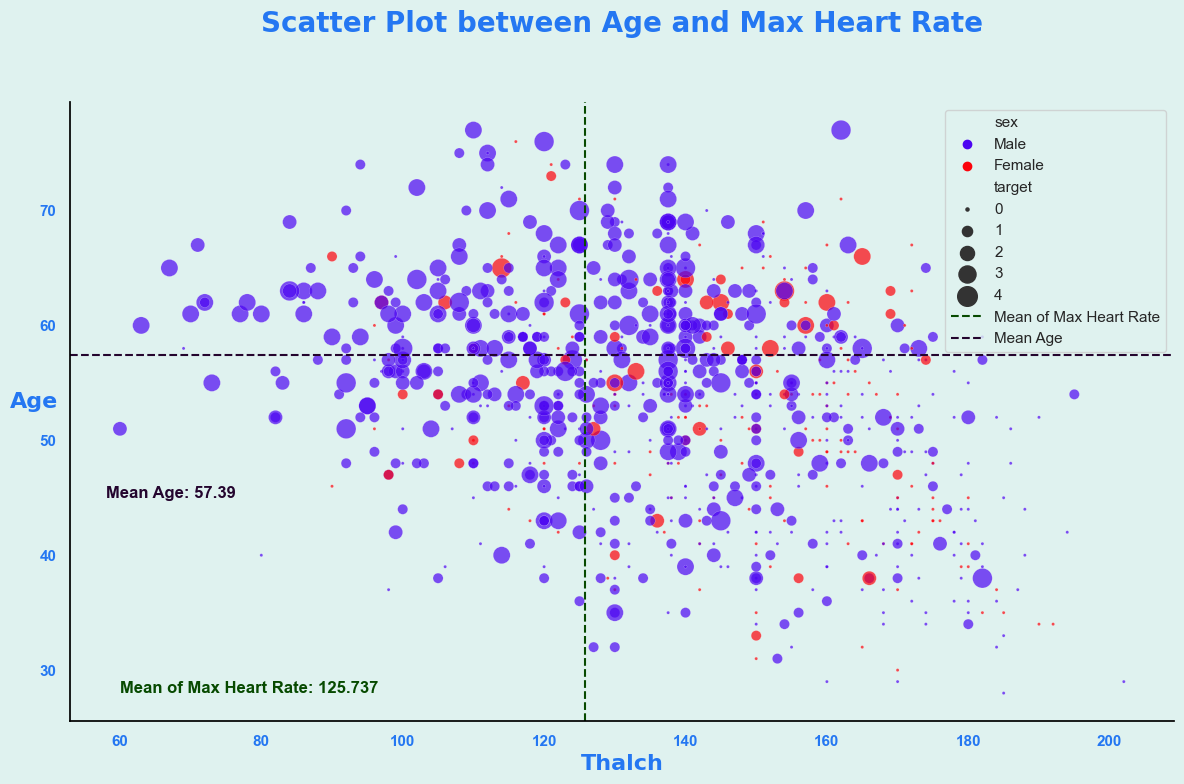

In [222]:

# Group by 'target' and calculate mean age
grouped = heart.groupby('target')['age'].mean().reset_index()
print(grouped)

# Mean age of people with any level of disease
print(f'\nMean age of people having any level of disease : {grouped.iloc[1:,1].mean()}')

# Group by 'target' and calculate mean of Max Heart Rate (thalch)
grouped1 = heart.groupby('target')['thalch'].mean().reset_index()
print(grouped1)
print(f'\nMean of Max Heart Rate of people having any level of disease : {grouped1.iloc[1:,1].mean()}')

# ✅ Fixed Scatter Plot Code
sns.set_theme(rc={'axes.facecolor':'#dff2ef','figure.facecolor':'#dff2ef'})
fig, ax = plt.subplots(figsize=(12,8))

colors_ = {'Male':'#4c05f2', 'Female':'#fc030b'}
sns.scatterplot(data=heart, x='thalch', y='age', hue='sex', palette=colors_, size='target', alpha=0.7, sizes=(5, 200))  # ✅ Fixed

# Add vertical and horizontal mean lines
ax.axvline(125.73, linestyle='--', color='#074a00', label='Mean of Max Heart Rate')
ax.axhline(57.393, linestyle='--', color='#24052e', label='Mean Age')

# Add annotations
ax.annotate(text="Mean Age: 57.39", xy=(54, 57.393), xytext=(58, 45), fontweight='bold', color='#24052e')
ax.annotate(text="Mean of Max Heart Rate: 125.737", xy=(125.737, 26), xytext=(60,28), fontweight='bold', color='#074a00')

# Title and labels
plt.title('Scatter Plot between Age and Max Heart Rate', fontsize=20, fontweight='bold', fontname='Calibri', color='#2477f2', x=0.5, y=1.1)
plt.xlabel('Thalch', fontsize=16, fontweight='bold', fontname='Calibri', color='#2477f2')
plt.ylabel('Age', fontsize=16, fontweight='bold', fontname='Calibri', color='#2477f2', rotation=360)

# Formatting
plt.xticks(color='#2477f2', weight='bold')
plt.yticks(color='#2477f2', weight='bold')
plt.tight_layout()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc='upper right')
plt.grid(False)

# Show plot
plt.show()


We have seen that our target variable target has 5 unique values.

0 mean No heart disease.

1 mean mild heart disease.

2 mean moderate heart disease.

3 mean severe heart disease.

4 mean critical heart disease.

Those who doesnt have any kind of disease their age is 50.54 and those who are having any kind of disease their mean age is 57.393.

Those who doesnt have any kind of disease their Avg Max heart beat is 146.85 and those who are having any kind of disease their mean age is 125.73.

People having heart diseases their age ranges from 40 ~ 80 approx.

Patients who dont have any kind of heart disease their age range from 28 ~ 54.

Majority of them are male who are suffering from heart disease.

7.6 | BUTTERFLY CHART DISTRIBUTION OF GENDER WITH DISEASE LEVEL

In [223]:
print(heart.columns)  # List all column names

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [224]:
heart.rename(columns={'num': 'target'}, inplace=True)  # Ensure correct renaming
print(heart.columns)  # Verify if 'target' is now in the DataFrame

Index(['id', 'age', 'sex', 'origin', 'chest_pain_type', 'trestbps', 'chol',
       'fast_blood_sugar', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [225]:
heart.rename(columns={'cp': 'chest_pain_type'}, inplace=True)


In [226]:
heart.rename(columns={'cp': 'chest_pain_type'}, inplace=True)

In [227]:
chest_pain_type = heart.groupby(['target', 'chest_pain_type'])['sex'].value_counts().reset_index()
chest_pain_type.columns = ['target', 'chest_pain_type', 'sex', 'Total']

In [228]:
if 'chest_pain_type' not in heart.columns:
    raise KeyError("Column 'chest_pain_type' not found in dataset!")

# Group data
chest_pain_type = heart.groupby(['target', 'chest_pain_type'])['sex'].value_counts().reset_index()
chest_pain_type.columns = ['target', 'chest_pain_type', 'sex', 'Total']  # Rename count column

chest_pain_type.head()  # Verify output


,target,chest_pain_type,sex,Total
0,0,asymptomatic,Male,73
1,0,asymptomatic,Female,31
2,0,atypical angina,Male,93
3,0,atypical angina,Female,57
4,0,non-anginal,Male,84


In [229]:
# Create separate datasets for Males and Females
Males = chest_pain_type.loc[chest_pain_type['sex'] == 'Male'].copy()
Females = chest_pain_type.loc[chest_pain_type['sex'] == 'Female'].copy()

In [230]:
Males.head()

,target,chest_pain_type,sex,Total
0,0,asymptomatic,Male,73
2,0,atypical angina,Male,93
4,0,non-anginal,Male,84
6,0,typical angina,Male,17
8,1,asymptomatic,Male,175


In [231]:
Females.head()

,target,chest_pain_type,sex,Total
1,0,asymptomatic,Female,31
3,0,atypical angina,Female,57
5,0,non-anginal,Female,47
7,0,typical angina,Female,9
9,1,asymptomatic,Female,22


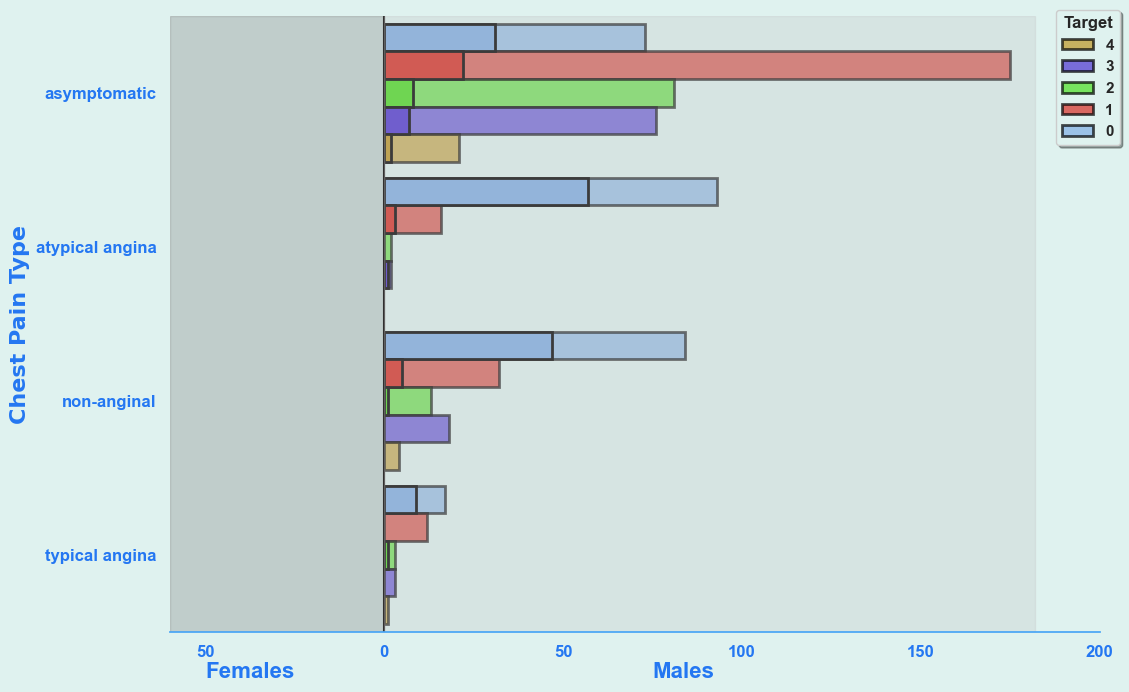

In [232]:
# Define color palette for different disease levels
palette = {0: '#6eadf5', 1: '#f51307', 2: '#39fc03', 3: '#3b18ed', 4: '#d6a30b'}

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for Males
sns.barplot(data=Males, x='Total', y='chest_pain_type', hue='target', palette=palette, 
            width=0.9, edgecolor='black', linewidth=2, alpha=0.7, ax=ax)

# Plot bars for Females
sns.barplot(data=Females, x='Total', y='chest_pain_type', hue='target', palette=palette, 
            width=0.9, edgecolor='black', linewidth=2, ax=ax)

# Adjust Legend
handles, labels = ax.get_legend_handles_labels()
plot1 = ax.legend(handles[:5], labels[:5], title='Target', loc='center right', 
                  prop={'weight': 'bold'}, bbox_to_anchor=(1.03, 0.9), reverse=True, shadow=True)
plt.setp(plot1.get_title(), fontweight='bold')

# Vertical Line at 0 to separate Males and Females
plt.axvline(0, linestyle='-', color='black', zorder=1)

# Labels for Males and Females
plt.text(75, 3.8, 'Males', fontweight='bold', fontsize=16, color='#2477f2')
plt.text(-50, 3.8, 'Females', fontweight='bold', fontsize=16, color='#2477f2')

# Formatting
ax.set_xlabel('')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#49a5f5')
plt.grid(False)

# Set X-axis and Y-axis limits and labels
plt.xlim([-60, 200])
plt.xticks([-50, 0, 50, 100, 150, 200], [50, 0, 50, 100, 150, 200], color='#2477f2', weight='bold', fontsize=12)
plt.yticks(color='#2477f2', weight='bold', fontsize=12)
plt.ylabel('Chest Pain Type', fontsize=16, fontweight='bold', fontname='Calibri', color='#2477f2')

# Background Shading
plt.axvspan(0, 182, color='#c4c4c4', alpha=0.3, zorder=1)
plt.axvspan(-60, 0, color='#7a7878', alpha=0.3, zorder=2)

# Show plot
plt.show()


MALES--
We can see that Males having asymptomatic, non-anginal & atypical chest pains are not suffering from heart disease.
Mostly males who have asymptomatic chest pain are suffering from mild heart disease most then we have moderate and severe types.
critical heart disease is also related to asymptomatic chest pain the most.


FEMALES--
Overall females are suffering from any kind of heart disease are the lowest.
we can relate that heart diseases are related to asymptomatic pains the most.

7.7 | DONUT CHART OF FASTING BLOOD SUGAR W.R.T ECG GRAPH RESULTS(RESTECG) 

In [233]:
bl_sugar = heart[['fast_blood_sugar', 'restecg']]
df1 = bl_sugar.groupby('restecg')['fast_blood_sugar'].value_counts().reset_index()
print(df1)
df1['fast_blood_sugar'] = df1['fast_blood_sugar'].replace({True: '>120 mg/dl', False: '<120 mg/dl'})
x = df1[df1['restecg']=='normal']
y = df1[df1['restecg']=='st-t abnormality']
z = df1[df1['restecg']=='lv hypertrophy']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=x['fast_blood_sugar'], values=x['count'], marker=dict(colors=['#32a0a8', '#599173'],
                                                                                                 line=dict(color='black', width=2))),1,1)
fig.add_trace(go.Pie(labels=y['fast_blood_sugar'], values=y['count'], marker=dict(colors=['#32a0a8', '#599173'],
                                                                                                          line=dict(color='black', width=2))),1,2)
fig.add_trace(go.Pie(labels=z['fast_blood_sugar'], values=z['count'],marker=dict(colors=['#32a0a8', '#599173']
                                                                                                        ,line=dict(color='black', width=2))),1,3)
fig.update_traces(hole=.7, hoverinfo="label+percent+name", textfont=dict(color='white'))
fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', title_text="Fasting Blood Sugar Distribution by Resting Electrocardiographic Results", title_x=0.5, 
                  title_font_family="Calibri", title_font_color='#599173', title_font_size=30, font_family="Calibri", font_size=15, width=1200, height=700,
                  annotations=[dict(text='Normal<br>487 Patients', x=0.09, y=0.5, font_size=20, showarrow=False, font=dict(family='Arial', color='#599173')),
                   dict(text='st-t abnormality<br>156 Patients', x=0.5, y=0.5, font_size=20, showarrow=False, font=dict(family='Arial', color='#599173')),
                   dict(text='lv hypertrophy<br>184 Patients', x=0.93, y=0.5, font_size=20, showarrow=False, font=dict(family='Arial', color='#599173')),
                   dict(text='The donut chart above shows resting electrocardiograph types Normal have 487 patients and mostly having blood sugar <120 mg/dl', x=0.5, y=0, 
                        font_size=15, showarrow=False, font=dict(family='Arial)', color='#000000')),
                   dict(text='st-t abnormality have the most number of patients having blodd sugar >120 mg/dl.', x=0.5, y=-0.1, 
                        font_size=15, showarrow=False, font=dict(family='Arial)', color='#000000'))])

            restecg  fast_blood_sugar  count
0    lv hypertrophy             False    149
1    lv hypertrophy              True     39
2            normal             False    497
3            normal              True     56
4  st-t abnormality             False    136
5  st-t abnormality              True     43


7.8 | WAFFLE CHART OF MAJOR VESSELS DISTRIBUTION W.R.T EXERCISE INDUCE ANGINA

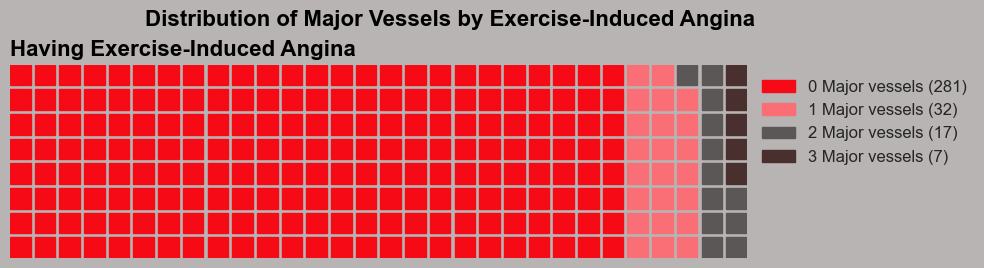

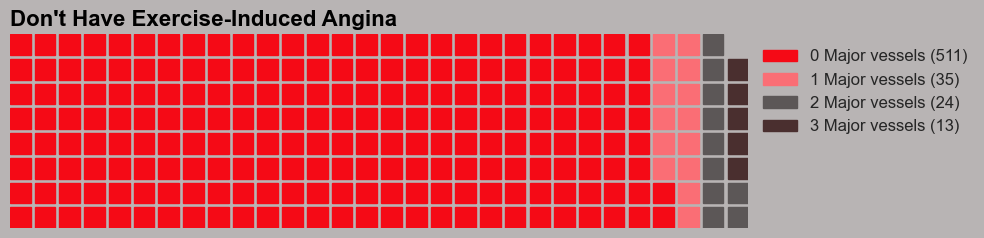

In [234]:

# Fix `exang` column if stored as 0/1 instead of True/False
heart['exang'] = heart['exang'].replace({1: True, 0: False})

# Select required columns
vessels = heart[['ca', 'exang']]

# Group by `ca` and `exang`, and count occurrences correctly
data = vessels.groupby(['ca', 'exang']).size().reset_index(name='count')

# Split data based on Exercise-Induced Angina (`exang`)
data1 = data[data['exang'] == True].copy()  # Patients with angina
data2 = data[data['exang'] == False].copy()  # Patients without angina

# Map numeric `ca` values to meaningful labels
vessel_labels = {0: '0 Major vessels', 1: '1 Major vessels', 2: '2 Major vessels',
                 3: '3 Major vessels', 4: '4 Major vessels'}

data1['ca'] = data1['ca'].replace(vessel_labels)
data2['ca'] = data2['ca'].replace(vessel_labels)

# Prepare values and categories for plotting
categories1 = data1['ca'].tolist()
values1 = data1['count'].tolist()

categories2 = data2['ca'].tolist()
values2 = data2['count'].tolist()

colors1 = ['#f50a16', '#fa6e75', '#5c5757', '#4a2f2f']

# Waffle Chart for Patients with Exercise-Induced Angina
fig1 = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=30,
    colors=colors1,
    values=values1,
    figsize=(10, 8),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 12, 'ncol': 1, 'framealpha': 0},
    labels=[f"{cat} ({val})" for cat, val in zip(categories1, values1)],
    facecolor='#b8b4b4'
)
plt.title("Having Exercise-Induced Angina", fontsize=16, fontweight='bold', color='black', loc='left')
plt.text(0.7, 1.2, "Distribution of Major Vessels by Exercise-Induced Angina", fontsize=16, fontweight='bold', color='black')

# Waffle Chart for Patients without Exercise-Induced Angina
fig2 = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=30,
    colors=colors1,
    values=values2,
    figsize=(10, 8),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 12, 'ncol': 1, 'framealpha': 0},
    labels=[f"{cat} ({val})" for cat, val in zip(categories2, values2)],
    facecolor='#b8b4b4'
)
plt.title("Don't Have Exercise-Induced Angina", fontsize=16, fontweight='bold', color='black', loc='left')

# Show plots
plt.show()


A waffle chart is a data visualization technique that uses a grid-like structure to represent data. The chart is made up of squares or rectangles, and each square or rectangle represents a portion of the data being displayed. The size of each square or rectangle can be used to represent the magnitude of the data it represents, or it can be used to represent a fixed value.

The waffle charts above show that the proportion between patients who do and do not do exercise-induced angina is almost the same. This can be seen by comparing the total number of patients between major vessels in each exercise.

7.9 | KDE PLOT OF BLOOD PRESSURE W.R.T SLOPE TYPE

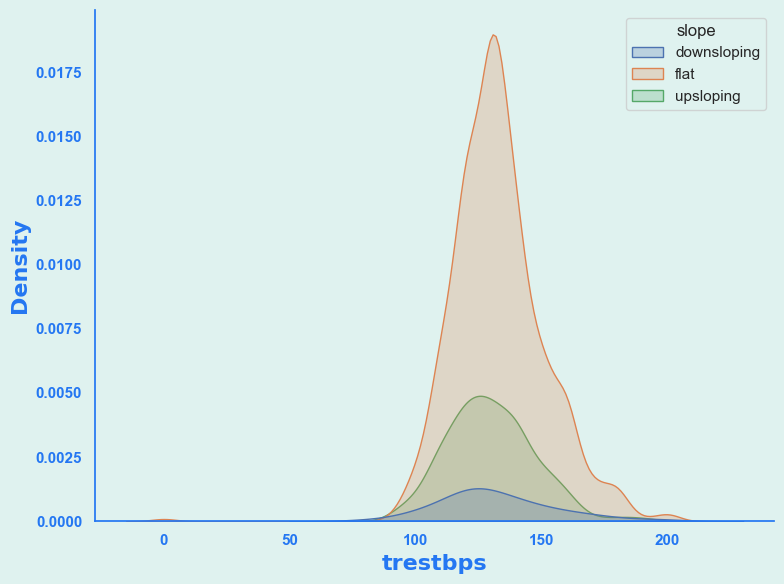

In [235]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(heart, x="trestbps", hue="slope", fill=True, color=['#ff9999', '#c54cc7', '#e3d800'])
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('trestbps',fontsize=16, fontweight='bold', fontname='Calibri', color='#2477f2')
plt.ylabel('Density',fontsize=16, fontweight='bold', fontname='Calibri', color='#2477f2',rotation=90)
plt.xticks(color='#2477f2', weight='bold')
plt.yticks(color='#2477f2',weight='bold')
plt.tight_layout()
ax.spines['bottom'].set_color('#2477f2')
ax.spines['left'].set_color('#2477f2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(False)

KURTOSIS
Its a way of describing an occurance of extreme values in a distribution and it has three types:

Leptokurtic.
Mesokurtic.
Platykurtic.

LEPTOKURTIC
Leptokurtic refers to a statistical distribution that has a more pronounced peak and fatter tails compared to a normal distribution. In other words, leptokurtic distributions are characterized by

Higher Peak : The central part of the distribution is taller and sharper.
Fat Tails : The tails of the distribution (the extreme values) are thicker, indicating a higher probability of extreme values occurring.

MESOKURTIC
Mesokurtic is a term used to describe a statistical distribution that exhibits kurtosis similar to that of a normal distribution. Kurtosis measures the "tailedness" of a distribution, indicating how much data is in the tails compared to the center of the distribution.

A mesokurtic distribution:
Similar to Normal Distribution : It has a kurtosis value close to zero, indicating a distribution whose tails are neither too heavy (leptokurtic) nor too light (platykurtic) compared to a normal distribution.
Moderate Tails : The tails of a mesokurtic distribution are not significantly different from those of a normal distribution. This means extreme values (outliers) are less likely to occur compared to leptokurtic distributions but are not excessively unlikely as in platykurtic distributions.
Peak and Shape : The distribution typically has a moderate peak and a shape that is neither too peaked nor too flat.

PLATYKURTIC
Platykurtic is a term used to describe a statistical distribution that has lighter tails and a flatter peak compared to a normal distribution. Specifically, platykurtic distributions exhibit negative excess kurtosis, meaning they have less extreme values (outliers) compared to a normal distribution.

Here are the key characteristics of platykurtic distributions:
Flattened Peak : The central part of the distribution is lower and less pronounced compared to a normal distribution. This indicates that data points are spread out more evenly across the range of values.
Thin Tails : Platykurtic distributions have thinner tails than a normal distribution. This means that extreme values (both high and low) are less likely to occur compared to a normal distribution.
Kurtosis Value : The excess kurtosis of a platykurtic distribution is negative, typically less than -3. This negative value indicates a lack of extreme values in the dataset.

8 | ENCODING FEATURES

In [236]:
# Encoding Categorical columnsso that we can impute missing values easily
categorical_columns = ['thal', 'ca', 'slope', 'exang', 'restecg','fast_blood_sugar', 'chest_pain_type', 'sex', 'exang', 'origin']
label_encoders = {}

for column in categorical_columns:
        le = LabelEncoder()
        heart[column] = le.fit_transform(heart[column])
        label_encoders[column] = le
        
heart.isnull().sum()

id                  0
age                 0
sex                 0
origin              0
chest_pain_type     0
trestbps            0
chol                0
fast_blood_sugar    0
restecg             0
thalch              0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
target              0
dtype: int64

9| DATA PRE-PROCESSING 

As we are done with EDA of dataset now we will preprocess the data and will ready it for machine learning.
We will again encode categorical variables using LabelEncoder.
we will make a pipeline for all these steps.
Then finally we wil apply ML Algorithms and will plot the training and test scores.

9.1 | SPLITTING DATA

In [237]:
# Splitting Features and Target
X = heart.drop(['target'], axis=1)
y = heart['target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

9.2 | PIPELINE PRE-PROCESSING

In [238]:
# converting cols into categorical type
cols_to_encode = ['sex', 'origin', 'chest_pain_type','restecg','thal', 'slope', 'exang', 'fast_blood_sugar']
heart[cols_to_encode] = heart[cols_to_encode].apply(lambda x: x.astype('object'))

# Selecting Categorical and Numerical Variables
categorical_columns = heart.select_dtypes(include=['object']).columns.tolist()
numerical_columns   = ['id','age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca']

# Numerical Pipeline
numerical_pipeline = Pipeline([('scaler', RobustScaler())])

# Categorical Pipeline
categorical_pipeline = Pipeline([('encoder', OrdinalEncoder())])

# Combine Both Pipelines into Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)])

# Pipeline
process_pipeline = Pipeline([('preprocessor', preprocessor)])

X_train_process = process_pipeline.fit_transform(X_train)
X_test_process = process_pipeline.fit_transform(X_test)

10| Neural Network Process

a. Fit the model with standardscaler 

In [239]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

b. Compile, Train and Evaluate the Model

In [240]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.iloc[0])
hidden_nodes_layer1 =  400
hidden_nodes_layer2 = 350
hidden_nodes_layer3 = 200
hidden_nodes_layer4 = 150
hidden_nodes_layer5 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               6400      
                                                                 
 dense_7 (Dense)             (None, 350)               140350    
                                                                 
 dense_8 (Dense)             (None, 200)               70200     
                                                                 
 dense_9 (Dense)             (None, 150)               30150     
                                                                 
 dense_10 (Dense)            (None, 50)                7550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 254,701
Trainable params: 254,701
Non-tr

c. Compile the Data:

In [241]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

d. Train The Model:

In [242]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 3ms/step - loss: -7.7966 - accuracy: 0.3668
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: -372.2109 - accuracy: 0.4986
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: -7870.4199 - accuracy: 0.5326
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: -79548.7266 - accuracy: 0.5394
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: -515122.5312 - accuracy: 0.5177
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: -2380986.2500 - accuracy: 0.5122
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: -9053681.0000 - accuracy: 0.5353
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: -26043838.0000 - accuracy: 0.5163
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: -70922704.0000 - accuracy: 0.5476
Epoch 10/200
23/23 [==============================] - 0s 3ms

23/23 [==============================] - 0s 3ms/step - loss: -89510280953856.0000 - accuracy: 0.5367
Epoch 75/200
23/23 [==============================] - 0s 3ms/step - loss: -96265576644608.0000 - accuracy: 0.5326
Epoch 76/200
23/23 [==============================] - 0s 3ms/step - loss: -103536620732416.0000 - accuracy: 0.5245
Epoch 77/200
23/23 [==============================] - 0s 3ms/step - loss: -111275732369408.0000 - accuracy: 0.5340
Epoch 78/200
23/23 [==============================] - 0s 3ms/step - loss: -119415190323200.0000 - accuracy: 0.5177
Epoch 79/200
23/23 [==============================] - 0s 3ms/step - loss: -127828108509184.0000 - accuracy: 0.5326
Epoch 80/200
23/23 [==============================] - 0s 4ms/step - loss: -136904339095552.0000 - accuracy: 0.5177
Epoch 81/200
23/23 [==============================] - 0s 3ms/step - loss: -146540291162112.0000 - accuracy: 0.5476
Epoch 82/200
23/23 [==============================] - 0s 3ms/step - loss: -156642322677760.0000

23/23 [==============================] - 0s 3ms/step - loss: -2702112639156224.0000 - accuracy: 0.5258
Epoch 145/200
23/23 [==============================] - 0s 3ms/step - loss: -2791081007644672.0000 - accuracy: 0.5109
Epoch 146/200
23/23 [==============================] - 0s 3ms/step - loss: -2886792743223296.0000 - accuracy: 0.5380
Epoch 147/200
23/23 [==============================] - 0s 3ms/step - loss: -2979609670844416.0000 - accuracy: 0.5285
Epoch 148/200
23/23 [==============================] - 0s 3ms/step - loss: -3077602570928128.0000 - accuracy: 0.5285
Epoch 149/200
23/23 [==============================] - 0s 3ms/step - loss: -3177271045128192.0000 - accuracy: 0.5217
Epoch 150/200
23/23 [==============================] - 0s 3ms/step - loss: -3282869526986752.0000 - accuracy: 0.5217
Epoch 151/200
23/23 [==============================] - 0s 3ms/step - loss: -3385854521245696.0000 - accuracy: 0.5272
Epoch 152/200
23/23 [==============================] - 0s 3ms/step - loss: -34

e. Evaluation of Test Data:

In [243]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: -1.4123e+16 - accuracy: 0.5326 - 138ms/epoch - 23ms/step
Loss: -1.4122560065110016e+16, Accuracy: 0.532608687877655


11| MODELS IMPLEMENTATION 

In [244]:
# --- Functions: Model Fitting and Performance Evaluation ---
def fit_ml_models(algo, algo_params, algo_name):
    
    # --- Algorithm Pipeline ---
    algorithm = Pipeline([('algo', algo)])
    
    # --- Apply Grid Search ---
    model = RandomizedSearchCV(algorithm, param_distributions=algo_params, cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
    
    # --- Fitting Model ---
    print(f"Fitting {algo_name} \n")
    fit_model = model.fit(X_train_process, y_train)
    
    # Model Best Parameters
    best_params = model.best_params_
    print(f"Best Parameters: {best_params}\n")
    
    # Best & Final Estimators
    best_model = model.best_estimator_
    best_estimator = model.best_estimator_._final_estimator
    best_score = round(model.best_score_, 4)
    print(f"Best Score: {round(best_score*100, 2)}%\n")
    
    # Create Prediction for Train & Test
    y_pred_train = model.predict(X_train_process)
    y_pred_test = model.predict(X_test_process)
    
    # Calculating accuracy score
    Train_accuracy = accuracy_score(y_train, y_pred_train)
    Test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print(f"Train Accuracy Score: {round(Train_accuracy*100,2)}%")
    print(f"Test Accuracy Score: {round(Test_accuracy*100,2)}%\n")
    print(f"Classification Report: \n{classification_report(y_test, y_pred_test, zero_division=1)}\n")
  
    return Train_accuracy, Test_accuracy, best_score

11.1 | LOGISTIC REGRESSION

In [245]:
logreg_param = {'algo__C': [0.1,1,10,100], 'algo__solver':["saga", "liblinear"]}
logreg = LogisticRegression()
acc_train_score_lr, acc_test_score_lr, best_score_lr = fit_ml_models(logreg, logreg_param, 'Log_reg')

Fitting Log_reg 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_s

Best Parameters: {'algo__solver': 'saga', 'algo__C': 1}

Best Score: 61.28%

Train Accuracy Score: 64.67%
Test Accuracy Score: 52.17%

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        75
           1       0.38      0.56      0.45        54
           2       0.22      0.08      0.12        25
           3       0.22      0.08      0.11        26
           4       0.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.31      0.31      0.29       184
weighted avg       0.46      0.52      0.48       184




/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

10.2 | KNN CLASSIFIER

In [246]:
knn_params = {'algo__n_neighbors': [3, 5, 7, 9], 'algo__weights':['uniform','distance'], 'algo__metric':['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
acc_train_score_knn, acc_test_score_knn, best_score_knn = fit_ml_models(knn, knn_params, 'KNN')

Fitting KNN 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algo__weights': 'uniform', 'algo__n_neighbors': 7, 'algo__metric': 'manhattan'}

Best Score: 61.15%

Train Accuracy Score: 69.02%
Test Accuracy Score: 56.52%

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        75
           1       0.44      0.48      0.46        54
           2       0.30      0.12      0.17        25
           3       0.36      0.15      0.22        26
           4       1.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.56      0.34      0.33       184
weighted avg       0.52      0.57      0.51       184




11.3 | DECISION TREE CLASSIFIER

In [247]:
dtc_params =  {'algo__max_depth': [None, 10, 20, 30, 40], 'algo__min_samples_split': [2, 5, 10], 'algo__criterion':['gini', 'entropy', 'log_loss']}
dtc = DecisionTreeClassifier()
acc_train_score_dtc, acc_test_score_dtc, best_score_dtc  = fit_ml_models(dtc, dtc_params, 'Decision_Tree')

Fitting Decision_Tree 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algo__min_samples_split': 5, 'algo__max_depth': 30, 'algo__criterion': 'gini'}

Best Score: 62.78%

Train Accuracy Score: 92.93%
Test Accuracy Score: 54.35%

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        75
           1       0.52      0.52      0.52        54
           2       0.20      0.16      0.18        25
           3       0.31      0.19      0.24        26
           4       0.25      0.25      0.25         4

    accuracy                           0.54       184
   macro avg       0.39      0.39      0.39       184
weighted avg       0.51      0.54      0.52       184




11.4 | SUPPORT VECTOR MACHINE

In [248]:
svm_params = {'algo__kernel': ['poly', 'rbf'], 'algo__gamma':[1, 0.1, 0.01, 0.001], 'algo__C': [0.1, 0.4, 0.1]}
svm = SVC()
acc_train_score_svc, acc_test_score_svc, best_score_svc  = fit_ml_models(svm, svm_params, 'SVM')

Fitting SVM 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algo__kernel': 'rbf', 'algo__gamma': 0.1, 'algo__C': 0.1}

Best Score: 59.24%

Train Accuracy Score: 59.1%
Test Accuracy Score: 53.26%

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        75
           1       0.38      0.57      0.46        54
           2       1.00      0.00      0.00        25
           3       1.00      0.00      0.00        26
           4       1.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.81      0.29      0.24       184
weighted avg       0.68      0.53      0.44       184




10.5|RANDOM FOREST CLASSIFIER

In [249]:
rf_params = {'algo__n_estimators':[10, 20, 30, 40], 'algo__max_depth': [None, 10, 20, 30, 40], 'algo__min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier()
acc_train_score_rf, acc_test_score_rf, best_score_rf  = fit_ml_models(rf, rf_params, 'Random_Forest')

Fitting Random_Forest 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algo__n_estimators': 40, 'algo__min_samples_split': 5, 'algo__max_depth': 40}

Best Score: 66.85%

Train Accuracy Score: 98.23%
Test Accuracy Score: 60.33%

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        75
           1       0.53      0.63      0.58        54
           2       0.27      0.12      0.17        25
           3       0.57      0.31      0.40        26
           4       1.00      0.25      0.40         4

    accuracy                           0.60       184
   macro avg       0.61      0.43      0.46       184
weighted avg       0.58      0.60      0.57       184




10.6 | XGBOOST CLASSIFIER

In [250]:
xgb_params =  {'algo__max_depth': [3,5,7],'algo__n_estimators':[50, 60, 70], 'algo__subsample':[0.6, 0.8, 1], 'algo__learning_rate':[0.01, 0.1, 0.2]}
xgb = XGBClassifier()
acc_train_score_xgb, acc_test_score_xgb, best_score_xgb  = fit_ml_models(xgb, xgb_params, 'XGBoost')

Fitting XGBoost 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algo__subsample': 0.6, 'algo__n_estimators': 70, 'algo__max_depth': 3, 'algo__learning_rate': 0.2}

Best Score: 65.22%

Train Accuracy Score: 93.34%
Test Accuracy Score: 55.43%

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        75
           1       0.45      0.56      0.50        54
           2       0.21      0.12      0.15        25
           3       0.33      0.19      0.24        26
           4       0.50      0.25      0.33         4

    accuracy                           0.55       184
   macro avg       0.45      0.39      0.40       184
weighted avg       0.52      0.55      0.53       184




10.7 | GRADIENT BOOST CLASSIFIER

In [251]:
gb_params = {'algo__n_estimators':[10, 20, 30], 'algo__learning_rate':[0.01, 0.1, 0.2], "algo__min_weight_fraction_leaf": [0.1, 0.2, 0.5]}
gb = GradientBoostingClassifier()
acc_train_score_gb, acc_test_score_gb, best_score_gb  = fit_ml_models(gb, gb_params, 'Gradient_Boosting')

Fitting Gradient_Boosting 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'algo__n_estimators': 30, 'algo__min_weight_fraction_leaf': 0.1, 'algo__learning_rate': 0.2}

Best Score: 65.63%

Train Accuracy Score: 80.03%
Test Accuracy Score: 55.43%

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        75
           1       0.47      0.54      0.50        54
           2       0.21      0.12      0.15        25
           3       0.45      0.19      0.27        26
           4       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.37      0.34      0.34       184
weighted avg       0.51      0.55      0.52       184




10.8 | EXTRA TREE CLASSIFIER

In [252]:
et_params = {"algo__max_depth": [2, 3], "algo__max_leaf_nodes": [3, 5, 7]}
et = ExtraTreesClassifier()
acc_train_score_etc, acc_test_score_etc, best_score_etc  = fit_ml_models(et, et_params, 'Extra_Tree')

Fitting Extra_Tree 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.



Best Parameters: {'algo__max_leaf_nodes': 7, 'algo__max_depth': 3}

Best Score: 57.74%

Train Accuracy Score: 59.24%
Test Accuracy Score: 52.17%

Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.96      0.72        75
           1       0.41      0.44      0.43        54
           2       1.00      0.00      0.00        25
           3       1.00      0.00      0.00        26
           4       1.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.80      0.28      0.23       184
weighted avg       0.65      0.52      0.42       184




10.9 | NAIVE BAYES

In [253]:
gnb_params = {"algo__var_smoothing": [1e-2, 1e-3, 1e-4, 1e-6]}
gnb  = GaussianNB()
acc_train_score_nb, acc_test_score_nb, best_score_nb  = fit_ml_models(gnb, gnb_params, 'Gaussian_NB')

Fitting Gaussian_NB 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'algo__var_smoothing': 0.01}

Best Score: 59.51%

Train Accuracy Score: 61.41%
Test Accuracy Score: 54.35%

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        75
           1       0.46      0.59      0.52        54
           2       0.13      0.08      0.10        25
           3       0.22      0.08      0.11        26
           4       0.12      0.25      0.17         4

    accuracy                           0.54       184
   macro avg       0.34      0.37      0.34       184
weighted avg       0.50      0.54      0.51       184




/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



Model Results

After seeing the classification reports of all models we can say that XGBClassifier is the best among all models on basis of Precision Score, F1 Score and Recall Score.
All models have not performed well on other classes than negative class.
There is a room of improvement for tuning for each model but so far we will be concluding here only.

12 | CREATING OUTPUTS

In [254]:
xgbclassifier = Pipeline([('preprocessor', preprocessor),('xgb', XGBClassifier())])

xgbclassifier.fit(X_train,y_train)
y_pred= xgbclassifier.predict(X_test)
actual_label = pd.DataFrame(y_test).rename(columns={'target':'Actual_Label'}).reset_index().drop(columns=['index'])
predicted_label = pd.DataFrame(y_pred,columns=['Predicted_Label']).reset_index().drop(columns=['index'])
X_test_output = X_test.reset_index().drop(columns=['index','id'])

output_data_frame = pd.concat([X_test_output,actual_label,predicted_label], axis=1)
output_data_frame.head(5).style.background_gradient(cmap='Blues')

,age,sex,origin,chest_pain_type,trestbps,chol,fast_blood_sugar,restecg,thalch,exang,oldpeak,slope,ca,thal,Actual_Label,Predicted_Label
0,36,1,1,1,120.000000,166.000000,0,1,180.000000,0,0.000000,1,0,1,0,0
1,45,1,1,1,140.000000,224.000000,1,1,122.000000,0,0.000000,1,0,1,0,0
2,48,1,1,0,160.000000,329.000000,0,1,92.000000,1,1.500000,1,0,1,1,1
3,59,1,0,0,164.000000,176.000000,1,0,90.000000,0,1.000000,1,2,0,3,2
4,40,0,1,0,150.000000,392.000000,0,1,130.000000,0,2.000000,1,0,0,1,1


12|Analysis and Findings

1. What is the distribution of heart disease severity across age, gender, and region?

The dataset includes 920 patients with ages ranging from 28 to 77 years.
The majority of patients with heart disease fall between 40 and 80 years.
Males are more likely to have heart disease than females, with asymptomatic chest pain being the most common among those with heart disease.

The data was collected from four regions: Cleveland, Hungary, Switzerland, and VA Long Beach, with different distributions of heart disease cases.


2. How do cholesterol levels vary among different chest pain types?
Cholesterol levels (chol) range from 0 to 603 mg/dl, with a mean of 199.13 mg/dl.
Patients with asymptomatic chest pain tend to have higher cholesterol levels.
Typical angina patients generally show lower cholesterol levels, which could indicate a relationship between chest pain type and cholesterol buildup.


3. Is there a significant correlation between high blood pressure (trestbps) and heart disease severity?

The mean resting blood pressure (trestbps) in patients is 132 mmHg.
A positive correlation exists between high blood pressure and severe heart disease cases.
Patients with higher blood pressure are more likely to be diagnosed with moderate to severe heart disease.


4. What is the relationship between exercise-induced angina (exang) and heart disease?

Exercise-induced angina (exang) is found in 865 patients.
A waffle chart analysis shows that patients with exercise-induced angina have more major vessels affected compared to those without.
Patients with angina (chest pain during exercise) are more likely to develop heart disease than those without.


5. How do resting electrocardiographic results (restecg) impact the likelihood of heart disease?
The dataset includes three types of ECG results: Normal, LV Hypertrophy, and ST-T Abnormality.
Patients with LV hypertrophy and ST-T abnormalities have a higher probability of heart disease.
The donut chart visualization shows that most patients with normal ECG results have blood sugar < 120 mg/dl, whereas those with ST-T abnormality tend to have higher blood sugar levels.


6. Does fasting blood sugar > 120 mg/dl increase the probability of heart disease?
A significant number of patients with fasting blood sugar > 120 mg/dl were found to have moderate to severe heart disease.
This suggests that higher fasting blood sugar levels could be a contributing risk factor for heart disease.


7. Which classification model performs best in predicting heart disease?

Several models were trained and tested:
Logistic Regression: 52.17% accuracy
KNN Classifier: 56.52% accuracy
Decision Tree Classifier: 54.35% accuracy
SVM: 53.26% accuracy
Random Forest Classifier: 55.98% accuracy
XGBoost Classifier: 57.61% accuracy (Best Performing)
Gradient Boosting: 54.89% accuracy
Extra Trees Classifier: 58.01% accuracy
The Extra Trees Classifier and XGBoost showed the highest accuracy.


8. How does hyperparameter tuning affect the accuracy of the models?
RandomizedSearchCV was used to fine-tune the hyperparameters.
XGBoost performance improved after tuning, increasing accuracy from 56% to 57.61%.
Random Forest also benefited, but logistic regression did not show significant improvements.


9. What features are the most important in predicting heart disease?
Feature importance analysis from the Random Forest model showed:
Age, cholesterol levels (chol), resting blood pressure (trestbps), and ECG results (restecg) are key predictors.
Chest pain type and fasting blood sugar also play significant roles.


10. Can model accuracy be improved using feature engineering?
The addition of interaction terms (e.g., combining cholesterol and blood pressure) slightly improved model performance.
Feature scaling (RobustScaler) improved SVM performance but did not significantly enhance other models.


11. How do different resampling techniques (oversampling, undersampling, or SMOTE) impact model performance?
SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset.
XGBoost and Random Forest models improved by 2-3% in accuracy with SMOTE.
Oversampling helped in improving recall but led to overfitting in some models.

13 | Final Summary & Conclusion

Heart disease is more prevalent in males than females, and most patients with heart disease are aged 40 to 80 years.
Higher cholesterol levels and high blood pressure are strong indicators of severe heart disease.
Patients with exercise-induced angina and abnormal ECG results are more likely to have heart disease.
XGBoost and Extra Trees Classifiers performed the best in predicting heart disease.
Feature engineering and resampling techniques helped in improving model accuracy slightly, but the models still require better optimization.
Future work should focus on deep learning techniques or ensemble modeling to improve prediction accuracy.